In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from helper import fields, interface, fields_original, from_matrix, RealWave
from fio import readin
import matplotlib as mpl
from matplotlib import ticker
import os
from case import Case
working_dir = '/home/jiarong/research/projects/windwave/rerun/'
mpl.style.use('pof')

https://aip.scitation.org/phf/authors/manuscript

In [3]:
"""Register the major cases, some have availtime more than 96 now"""
case_ensemble = []
for Bo,Re in zip([0.27,0.53,1.47,3.31],[2990,5000,10660,20000]):
    for ustar in [0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
        case = Case(ustar=ustar, ak=0.05, Bo=Bo, Re=Re, LEVEL=11, L0=1., g=1., k=2.*np.pi,
                    working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
        if os.path.exists(case.path):
            case_ensemble.append(case)
        else:
            case = Case(ustar=ustar, ak=0.05, Bo=Bo, Re=Re, LEVEL=11, L0=1., g=1., k=2.*np.pi,
                        working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_')
            if os.path.exists(case.path):
                case_ensemble.append(case)
for i,case in enumerate(case_ensemble):
    print('index=%g, Bo=%g,Re=%g,Ustar=%g,c=%g,N_available=%g\npath:' %(i,case.Bo,case.Re,case.ustar,case.wave.c,case.availt)+case.path)

index=0, Bo=0.27,Re=2990,Ustar=0.6,c=0.865227,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.6ak0.05Bo0.27Re2990.LEVEL11
index=1, Bo=0.27,Re=2990,Ustar=0.7,c=0.865227,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.7ak0.05Bo0.27Re2990.LEVEL11
index=2, Bo=0.27,Re=2990,Ustar=0.8,c=0.865227,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.8ak0.05Bo0.27Re2990.LEVEL11
index=3, Bo=0.27,Re=2990,Ustar=0.9,c=0.865227,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.9ak0.05Bo0.27Re2990.LEVEL11
index=4, Bo=0.27,Re=2990,Ustar=1,c=0.865227,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar1ak0.05Bo0.27Re2990.LEVEL11
index=5, Bo=0.53,Re=5000,Ustar=0.6,c=0.677825,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_

In [20]:
for case in case_ensemble:
    eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)
    case.growth_rate(96,CAPI=True)
    case.drift_evolution()

In [ ]:
# Register refinement level comparing cases 1/3
case_test = []
case = Case(ustar=0.7, ak=0.05, Bo=1.47, Re=10660, LEVEL=8, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_')
case_test.append(case)
case = Case(ustar=0.7, ak=0.05, Bo=1.47, Re=10660, LEVEL=9, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
case = Case(ustar=0.7, ak=0.05, Bo=1.47, Re=10660, LEVEL=10, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
case = Case(ustar=0.7, ak=0.05, Bo=1.47, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
case = Case(ustar=0.7, ak=0.05, Bo=1.47, Re=10660, LEVEL=12, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
for i,case in enumerate(case_test):
    print('index=%g, Bo=%g,Re=%g,Ustar=%g,c=%g,N_available=%g\npath:' %(i, case.Bo,case.Re,case.ustar,case.wave.c,case.availt) + case.path)
for case in case_test:
    eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)
    case.growth_rate(96,CAPI=True)
    case.drift_evolution()

In [14]:
# Register refinement level comparing cases 2/3, this is the one used in the paper
case_test = []
case = Case(ustar=0.6, ak=0.05, Bo=3.31, Re=20000, LEVEL=9, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
case = Case(ustar=0.6, ak=0.05, Bo=3.31, Re=20000, LEVEL=10, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
case = Case(ustar=0.6, ak=0.05, Bo=3.31, Re=20000, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
case = Case(ustar=0.6, ak=0.05, Bo=3.31, Re=20000, LEVEL=12, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
for i,case in enumerate(case_test):
    print('index=%g, Bo=%g,Re=%g,Ustar=%g,c=%g,N_available=%g\npath:' %(i, case.Bo,case.Re,case.ustar,case.wave.c,case.availt) + case.path)
for case in case_test:
    eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)
    case.growth_rate(96,CAPI=True)
    case.drift_evolution()

index=0, Bo=3.31,Re=20000,Ustar=0.6,c=0.455234,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.6ak0.05Bo3.31Re20000.LEVEL9
index=1, Bo=3.31,Re=20000,Ustar=0.6,c=0.455234,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.6ak0.05Bo3.31Re20000.LEVEL10
index=2, Bo=3.31,Re=20000,Ustar=0.6,c=0.455234,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.6ak0.05Bo3.31Re20000.LEVEL11
index=3, Bo=3.31,Re=20000,Ustar=0.6,c=0.455234,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.6ak0.05Bo3.31Re20000.LEVEL12


In [4]:
# Register refinement level comparing cases 3/3
case_test = []
case = Case(ustar=0.8, ak=0.05, Bo=0.53, Re=5000, LEVEL=9, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_top_')
case_test.append(case)
case = Case(ustar=0.8, ak=0.05, Bo=0.53, Re=5000, LEVEL=10, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_top_')
case_test.append(case)
case = Case(ustar=0.8, ak=0.05, Bo=0.53, Re=5000, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
for i,case in enumerate(case_test):
    print('index=%g, Bo=%g,Re=%g,Ustar=%g,c=%g,N_available=%g\npath:' %(i, case.Bo,case.Re,case.ustar,case.wave.c,case.availt) + case.path)
for case in case_test:
    eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)
    case.growth_rate(96,CAPI=True)
    case.drift_evolution()

index=0, Bo=0.53,Re=5000,Ustar=0.8,c=0.677825,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_top_Ustar0.8ak0.05Bo0.53Re5000.LEVEL9
index=1, Bo=0.53,Re=5000,Ustar=0.8,c=0.677825,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_top_Ustar0.8ak0.05Bo0.53Re5000.LEVEL10
index=2, Bo=0.53,Re=5000,Ustar=0.8,c=0.677825,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.8ak0.05Bo0.53Re5000.LEVEL11


0.19245499962783816
0.17826503885798226
0.16247108263666965


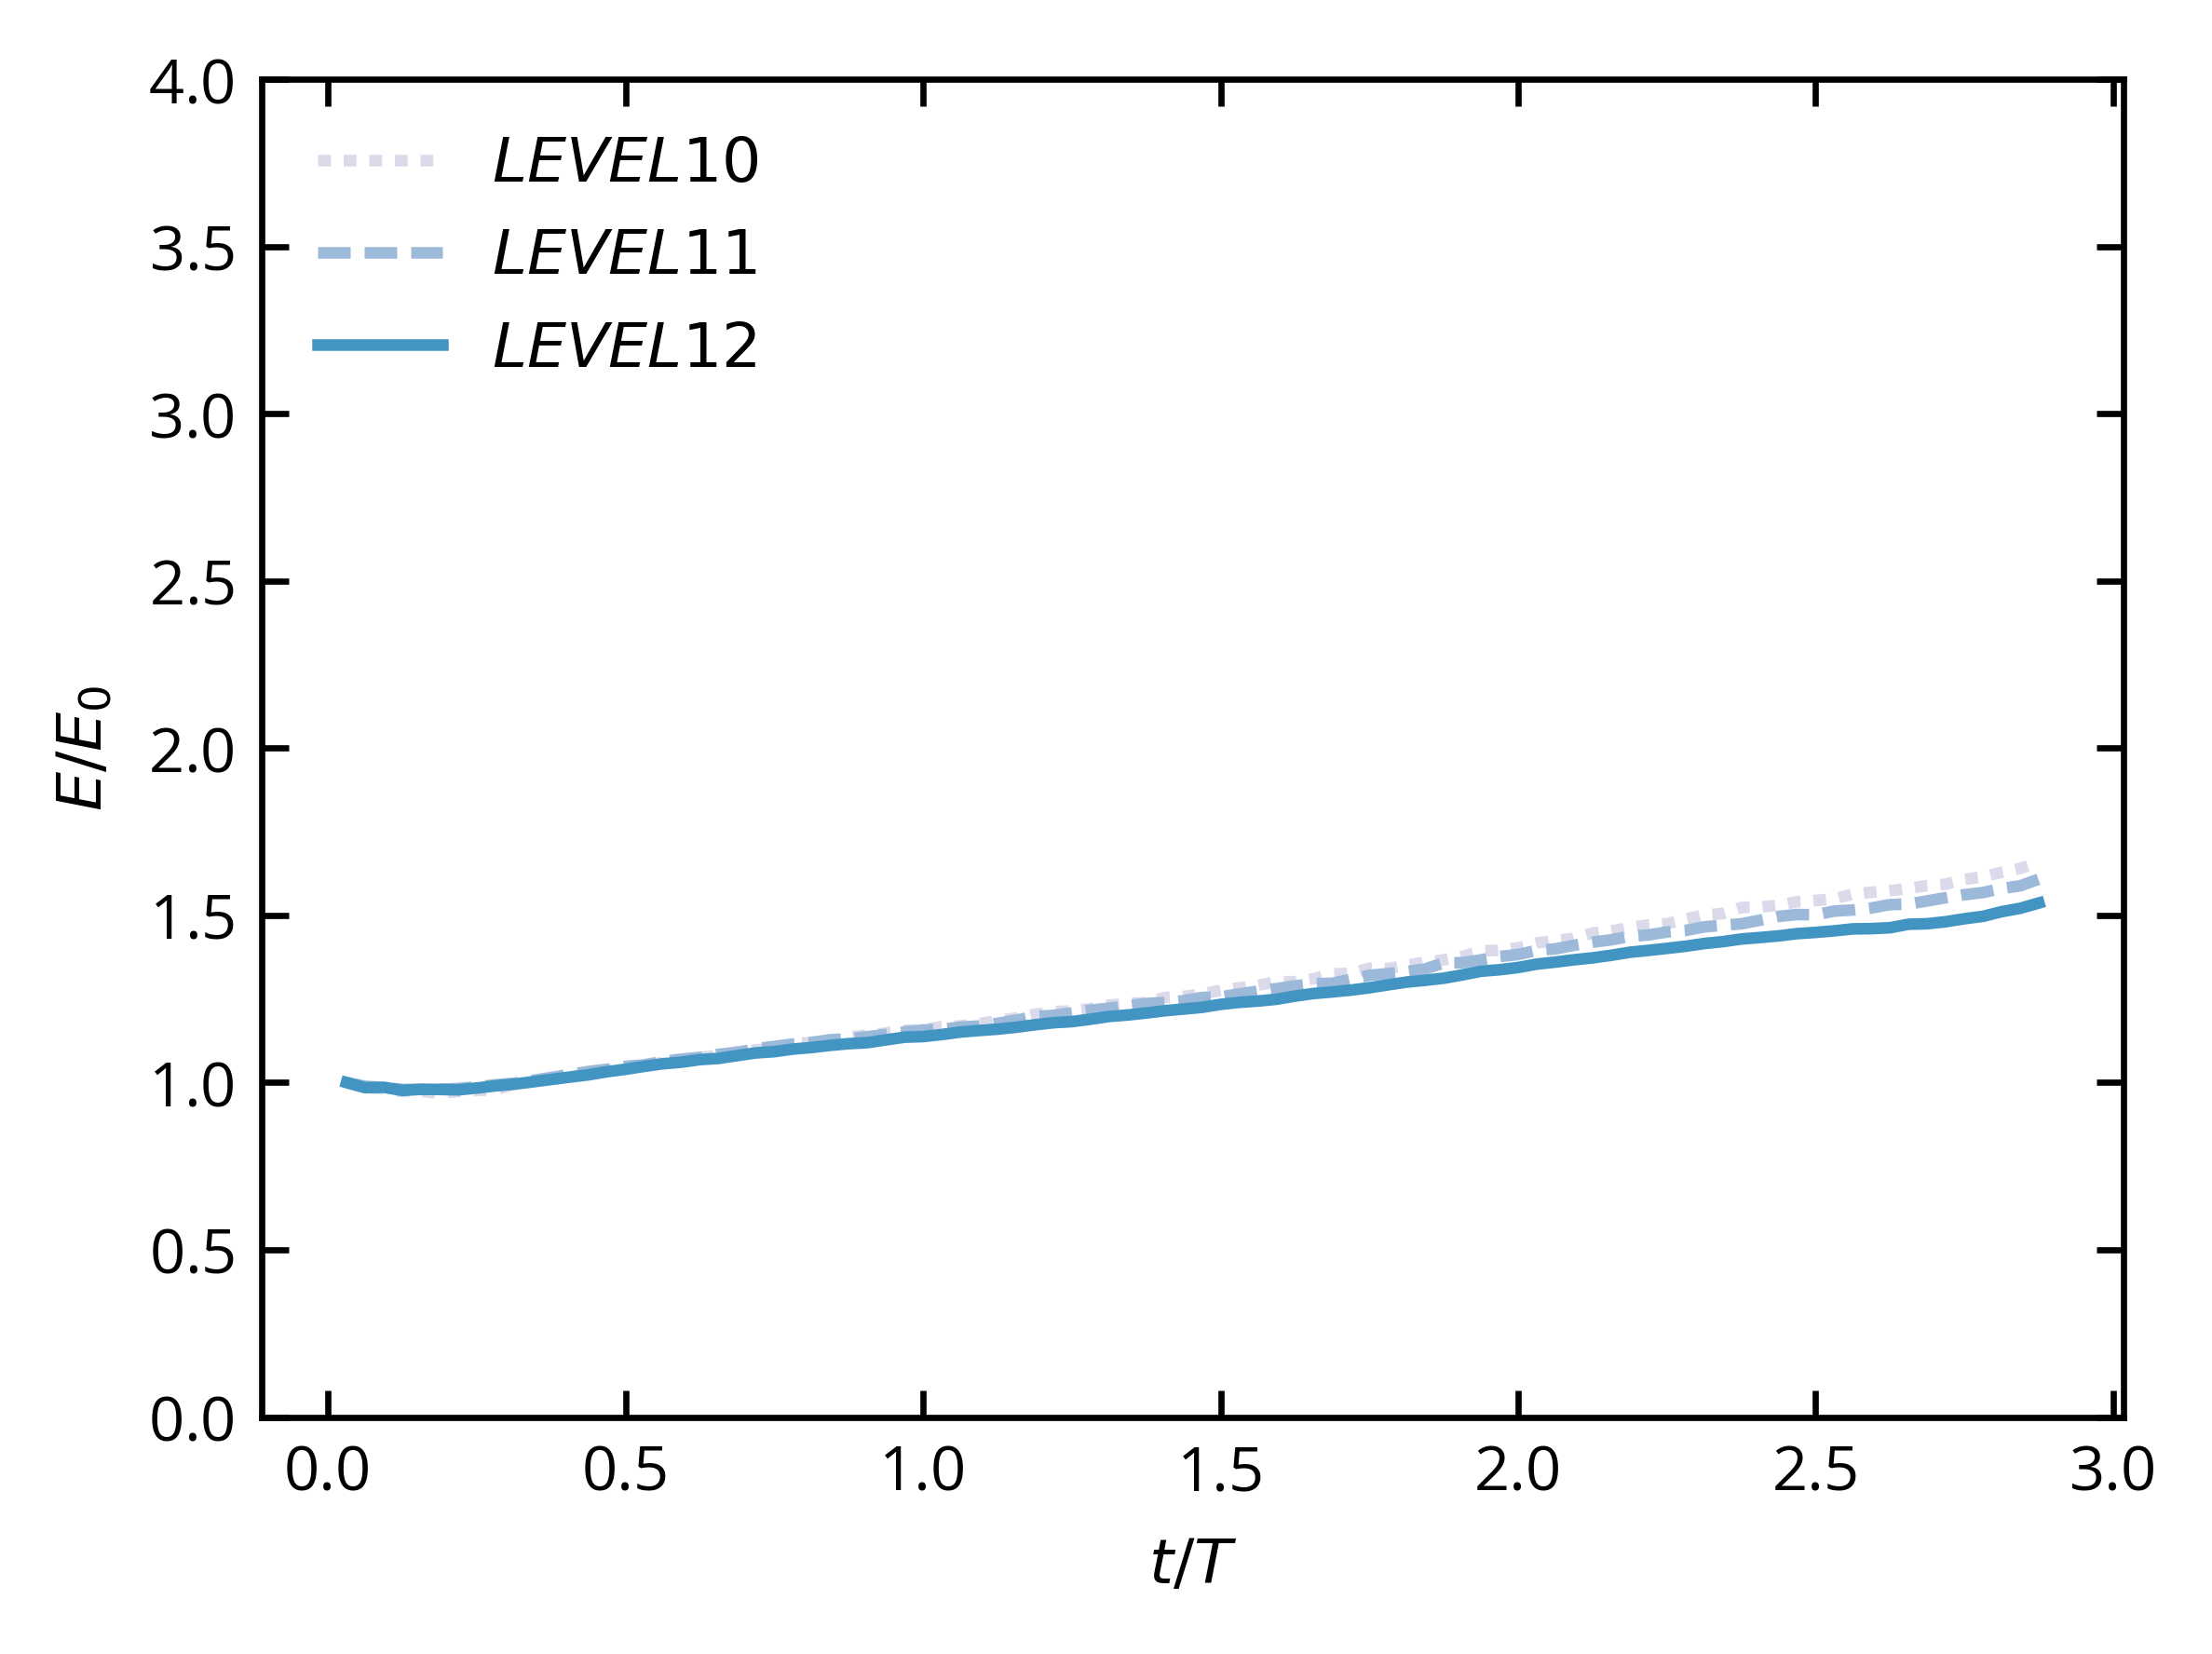

In [16]:
# Plotting level comparing cases. Might need to manually tweak things
from cycler import cycler
default_cycler = (cycler(linestyle=[':','--','-']))
plt.rc('axes', prop_cycle=default_cycler)
fig = plt.figure(figsize=[4,3]); ax =fig.gca()
for (i,case) in enumerate(case_test[1:]):
    ax.plot(case.t[1:-3],case.energy_wave[1:-3]/case.energy_wave[1], label=r'$LEVEL %g$' %case.LEVEL, color=plt.get_cmap('PuBu_r')(0.8-i*0.2))
    print(case.wa)
ax.set_ylim([0,4])
# ax.set_xlim([0,3])
ax.set_xlabel(r'$t/T$')
ax.set_ylabel(r'$E/E_0$')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.legend(loc='upper left')
fig.savefig(working_dir+'plots/rev_convergence_Re%g_norm_T3.pdf' %case.Re, bbox_inches='tight', pad_inches=0.1)

In [8]:
""" Register water refinement compare cases. One is for refined uwater with 0.005. The other is not set. """
case_test = []
case = Case(ustar=0.8, ak=0.05, Bo=0.53, Re=5000, LEVEL=11, L0=1., g=1., k=2.*np.pi,
            working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
case = Case(ustar=0.8, ak=0.05, Bo=0.53, Re=5000, LEVEL=11, L0=1., g=1., k=2.*np.pi,
            working_dir = '/home/jiarong/research/projects/windwave/rerun/', 
            prefix = 'linear_wavewind_rerun_test_particle_uwater_')
case_test.append(case)
for i,case in enumerate(case_test):
    print('index=%g, Bo=%g,Re=%g,Ustar=%g,c=%g,N_available=%g\npath:' %(i, case.Bo,case.Re,case.ustar,case.wave.c,case.availt) + case.path)
for case in case_test:
    eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 64, N_padding = 9, WINDOW = True)
    case.growth_rate(64,CAPI=True)
    case.drift_evolution()

index=0, Bo=0.53,Re=5000,Ustar=0.8,c=0.677825,N_available=96
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.8ak0.05Bo0.53Re5000.LEVEL11
index=1, Bo=0.53,Re=5000,Ustar=0.8,c=0.677825,N_available=84
path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_particle_uwater_Ustar0.8ak0.05Bo0.53Re5000.LEVEL11


In [ ]:
""" Plot w/ and without water refinement"""
from cycler import cycler
default_cycler = (cycler(linestyle=[':','--','-']))
plt.rc('axes', prop_cycle=default_cycler)
fig = plt.figure(figsize=[4,3]); ax =fig.gca()
for (i,case) in enumerate(case_test):
    ax.plot(case.t[0:64],case.energy_wave[0:64]/case.energy_wave[1], label=r'$LEVEL %g$' %case.LEVEL, color=plt.get_cmap('PuBu_r')(0.8-i*0.2))
    print(case.wa)
ax.set_ylim([0,4])
ax.set_xlim([0,2])
ax.set_xlabel(r'$t/T$')
ax.set_ylabel(r'$E/E_0$')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.legend(loc='upper left')
fig.savefig(working_dir+'plots/convergence_Re%g_norm_T2.eps' %case.Re, bbox_inches='tight', pad_inches=0.1)

In [329]:
""" Register other comparing cases. """
case_test = []
case = Case(ustar=0.8, ak=0.05, Bo=1.47, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_')
case_test.append(case)
case = Case(ustar=0.8, ak=0.05, Bo=1.47, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_test.append(case)
for case in case_test:
    if os.path.exists(case.path):
        case_ensemble.append(case)
    print('Bo=%g,Re=%g,Ustar=%g,c=%g,N_available=%g,path:' %(case.Bo,case.Re,case.ustar,case.wave.c,case.availt) + case.path)

Bo=1.47,Re=10660,Ustar=0.8,c=0.51713,N_available=160,path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_Ustar0.8ak0.05Bo1.47Re10660.LEVEL11
Bo=1.47,Re=10660,Ustar=0.8,c=0.51713,N_available=96,path:/home/jiarong/research/projects/windwave/rerun/linear_wavewind_rerun_test_Ustar0.8ak0.05Bo1.47Re10660.LEVEL11


In [19]:
"""register Bond comparing cases"""
case_Bo = []
case = Case(ustar=0.4, ak=0.05, Bo=1.47, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)
case = Case(ustar=0.6, ak=0.05, Bo=1.47, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)
case = Case(ustar=1, ak=0.05, Bo=1.47, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)
case = Case(ustar=0.4, ak=0.05, Bo=25, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)
case = Case(ustar=0.6, ak=0.05, Bo=25, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)
case = Case(ustar=1, ak=0.05, Bo=25, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)
case = Case(ustar=0.4, ak=0.05, Bo=200, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)
case = Case(ustar=0.6, ak=0.05, Bo=200, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)
case = Case(ustar=1, ak=0.05, Bo=200, Re=10660, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
case_Bo.append(case)

for case in case_Bo:
    print('Bo = %g, u*/c = %g' %(case.Bo, case.ustar))
    eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)
    case.growth_rate_notfiltered(96, CAPI=True)
    case.wa_nonfilter,case.wb_nonfilter = np.polyfit(case.t[1:96], np.log(case.energy_wave[1:96]), 1)
    print('Not filtered: %g' %case.wa_nonfilter)
    case.growth_rate(96, CAPI=True)
    print('Filtered: %g' %case.wa)

Bo = 1.47, u*/c = 0.4
Not filtered: -0.0582106
Filtered: -0.0582482
Bo = 1.47, u*/c = 0.6
Not filtered: 0.0276587
Filtered: 0.025132
Bo = 1.47, u*/c = 1
Not filtered: 0.561316
Filtered: 0.552547
Bo = 25, u*/c = 0.4
Not filtered: -0.0288646
Filtered: -0.0292431
Bo = 25, u*/c = 0.6
Not filtered: 0.0373541
Filtered: 0.0353455
Bo = 25, u*/c = 1
Not filtered: 0.433644
Filtered: 0.426269
Bo = 200, u*/c = 0.4
Not filtered: -0.0251181
Filtered: -0.0260708
Bo = 200, u*/c = 0.6
Not filtered: 0.0476358
Filtered: 0.0458691
Bo = 200, u*/c = 1
Not filtered: 0.426114
Filtered: 0.419025


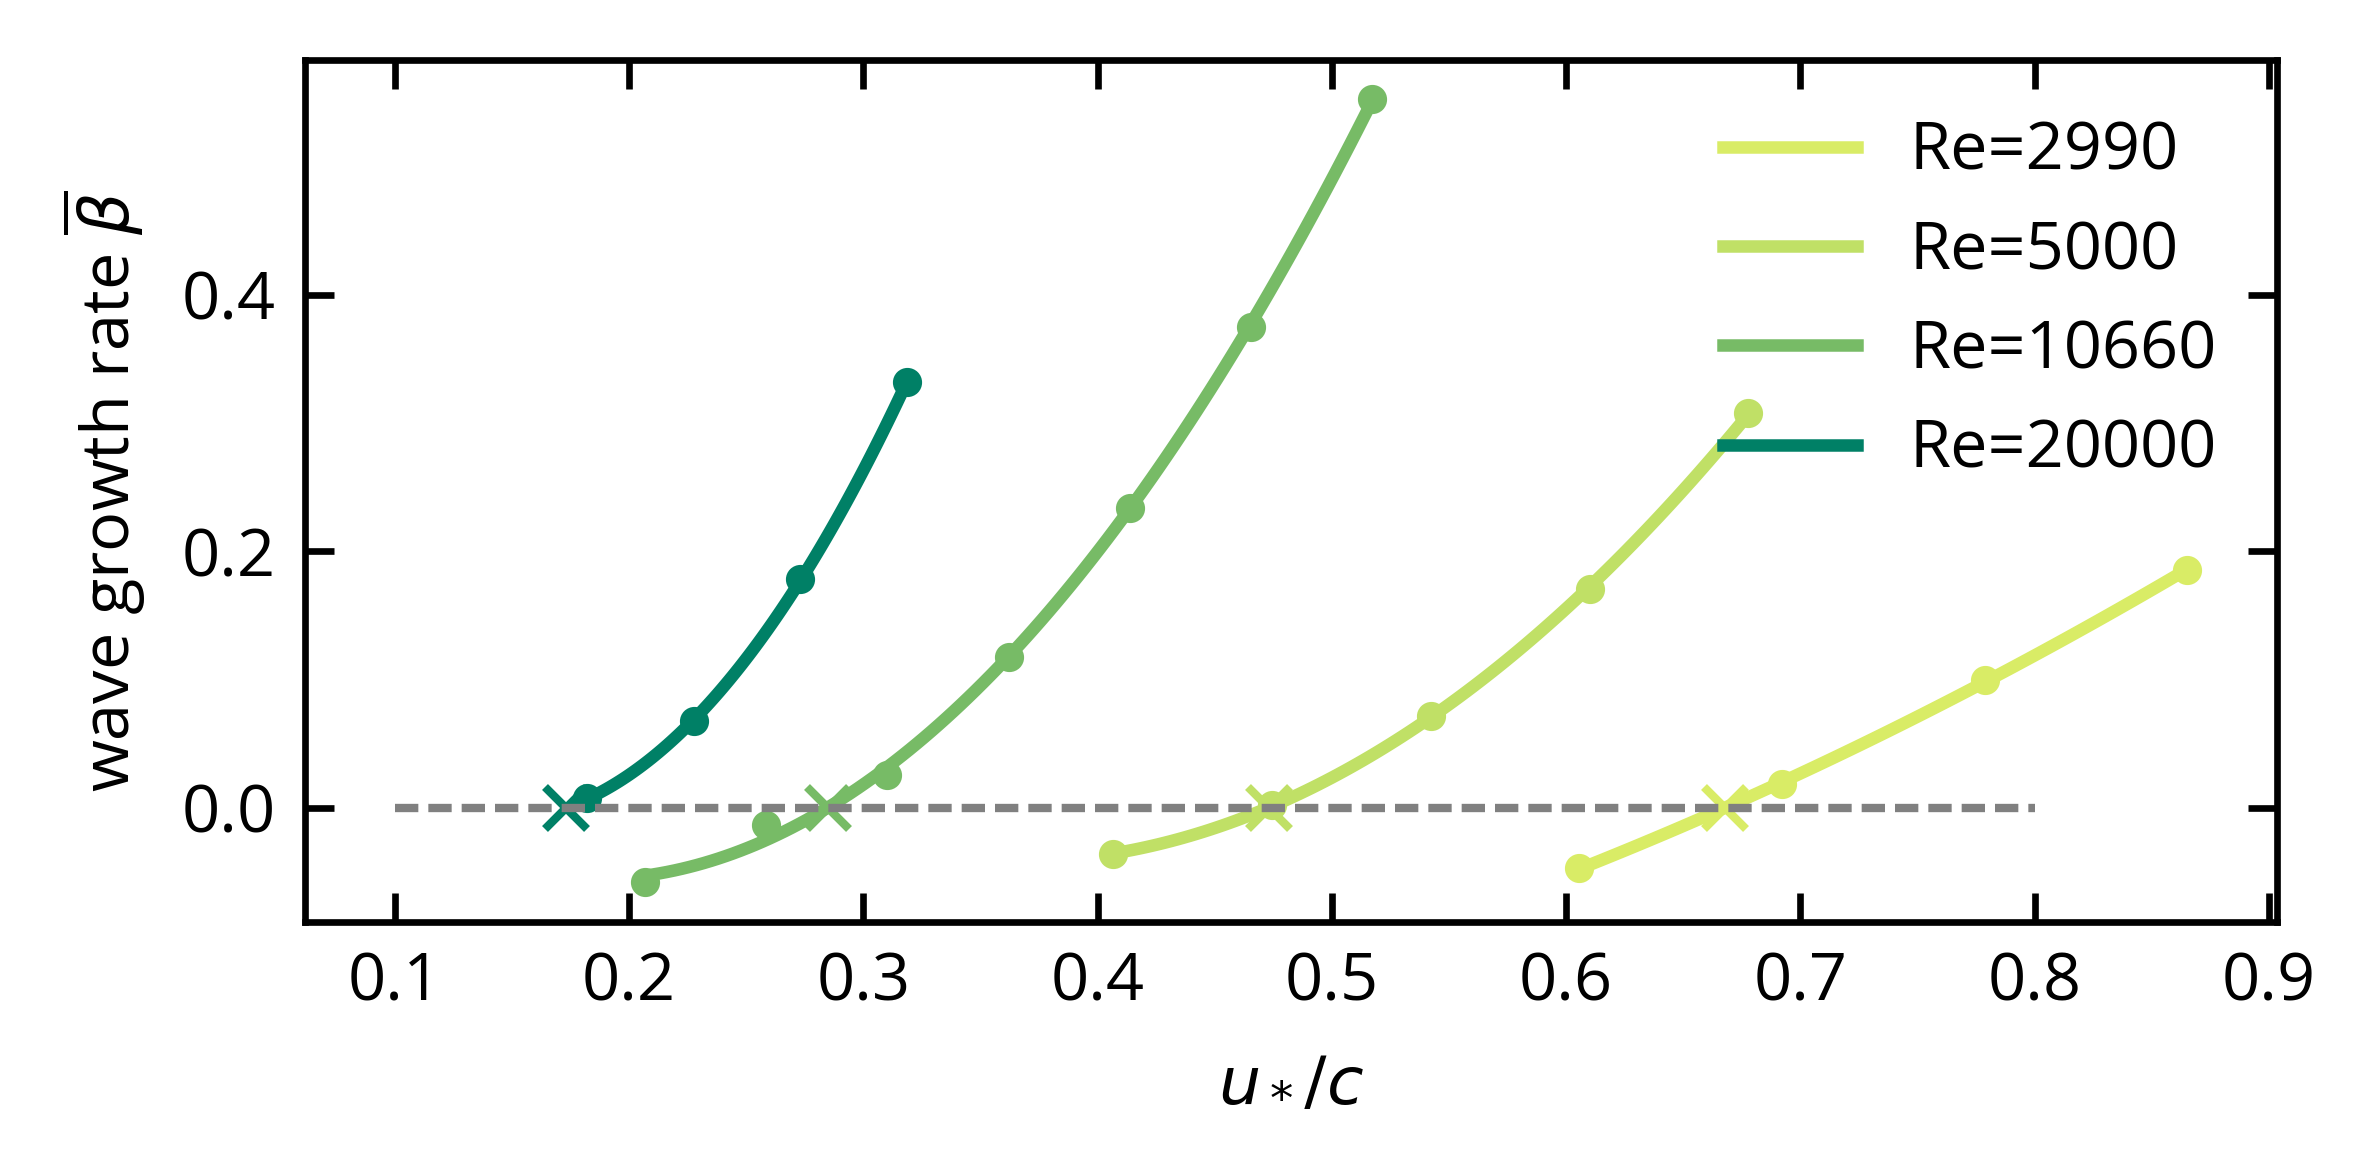

In [31]:
"""Plot the ensemble wave growth rate - exponential fit (as function of u* instead of u*/c)"""
fig = plt.figure(figsize=[4,2])
dict1 = {"Re":2990, "ustar":[], "rate":[], "omega":case_ensemble[0].wave.omega, "k":case_ensemble[0].wave.k}
dict2 = {"Re":5000, "ustar":[], "rate":[], "omega":case_ensemble[5].wave.omega, "k":case_ensemble[5].wave.k}
dict3 = {"Re":10660, "ustar":[], "rate":[], "omega":case_ensemble[10].wave.omega, "k":case_ensemble[10].wave.k}
dict4 = {"Re":20000, "ustar":[], "rate":[], "omega":case_ensemble[17].wave.omega, "k":case_ensemble[17].wave.k}
dict_ensemble = [dict1,dict2,dict3,dict4]
for REdict in dict_ensemble:
    for case in case_ensemble[1:]:
        if case.Re == REdict["Re"]:
            plt.plot(case.ustar*case.wave.c,case.wa,'.',color=plt.cm.get_cmap('summer')(1-case.Re/20000))
            REdict["ustar"].append(case.ustar*case.wave.c); REdict["rate"].append(case.wa)
for REdict in dict_ensemble:
    ustar = np.array(REdict["ustar"]); rate = np.array(REdict["rate"])
    z = np.polyfit(ustar, rate, 2); p = np.poly1d(z)
    ustar_plot = np.linspace(ustar[0],ustar[-1],100, endpoint=True)
    plt.plot(ustar_plot,p(ustar_plot), color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000), label='Re=%g' %REdict["Re"])
    REdict["thres"] = np.max(np.roots(p))
    plt.plot(REdict["thres"], 0, 'x', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000))
plt.ylabel(r'wave growth rate $\overline{\beta}$')
plt.xlabel(r'$u_*/c$')
ustar_plot = np.linspace(0.1,0.8,100)
plt.plot(ustar_plot,np.zeros(ustar_plot.shape),'--',color='gray',linewidth=1)
plt.legend()
plt.tight_layout()
# fig.savefig(working_dir+'plots/wave_growth_1.eps', bbox_inches='tight', pad_inches=0.1)

Text(0, 0.5, '$u_{thres}/c$')

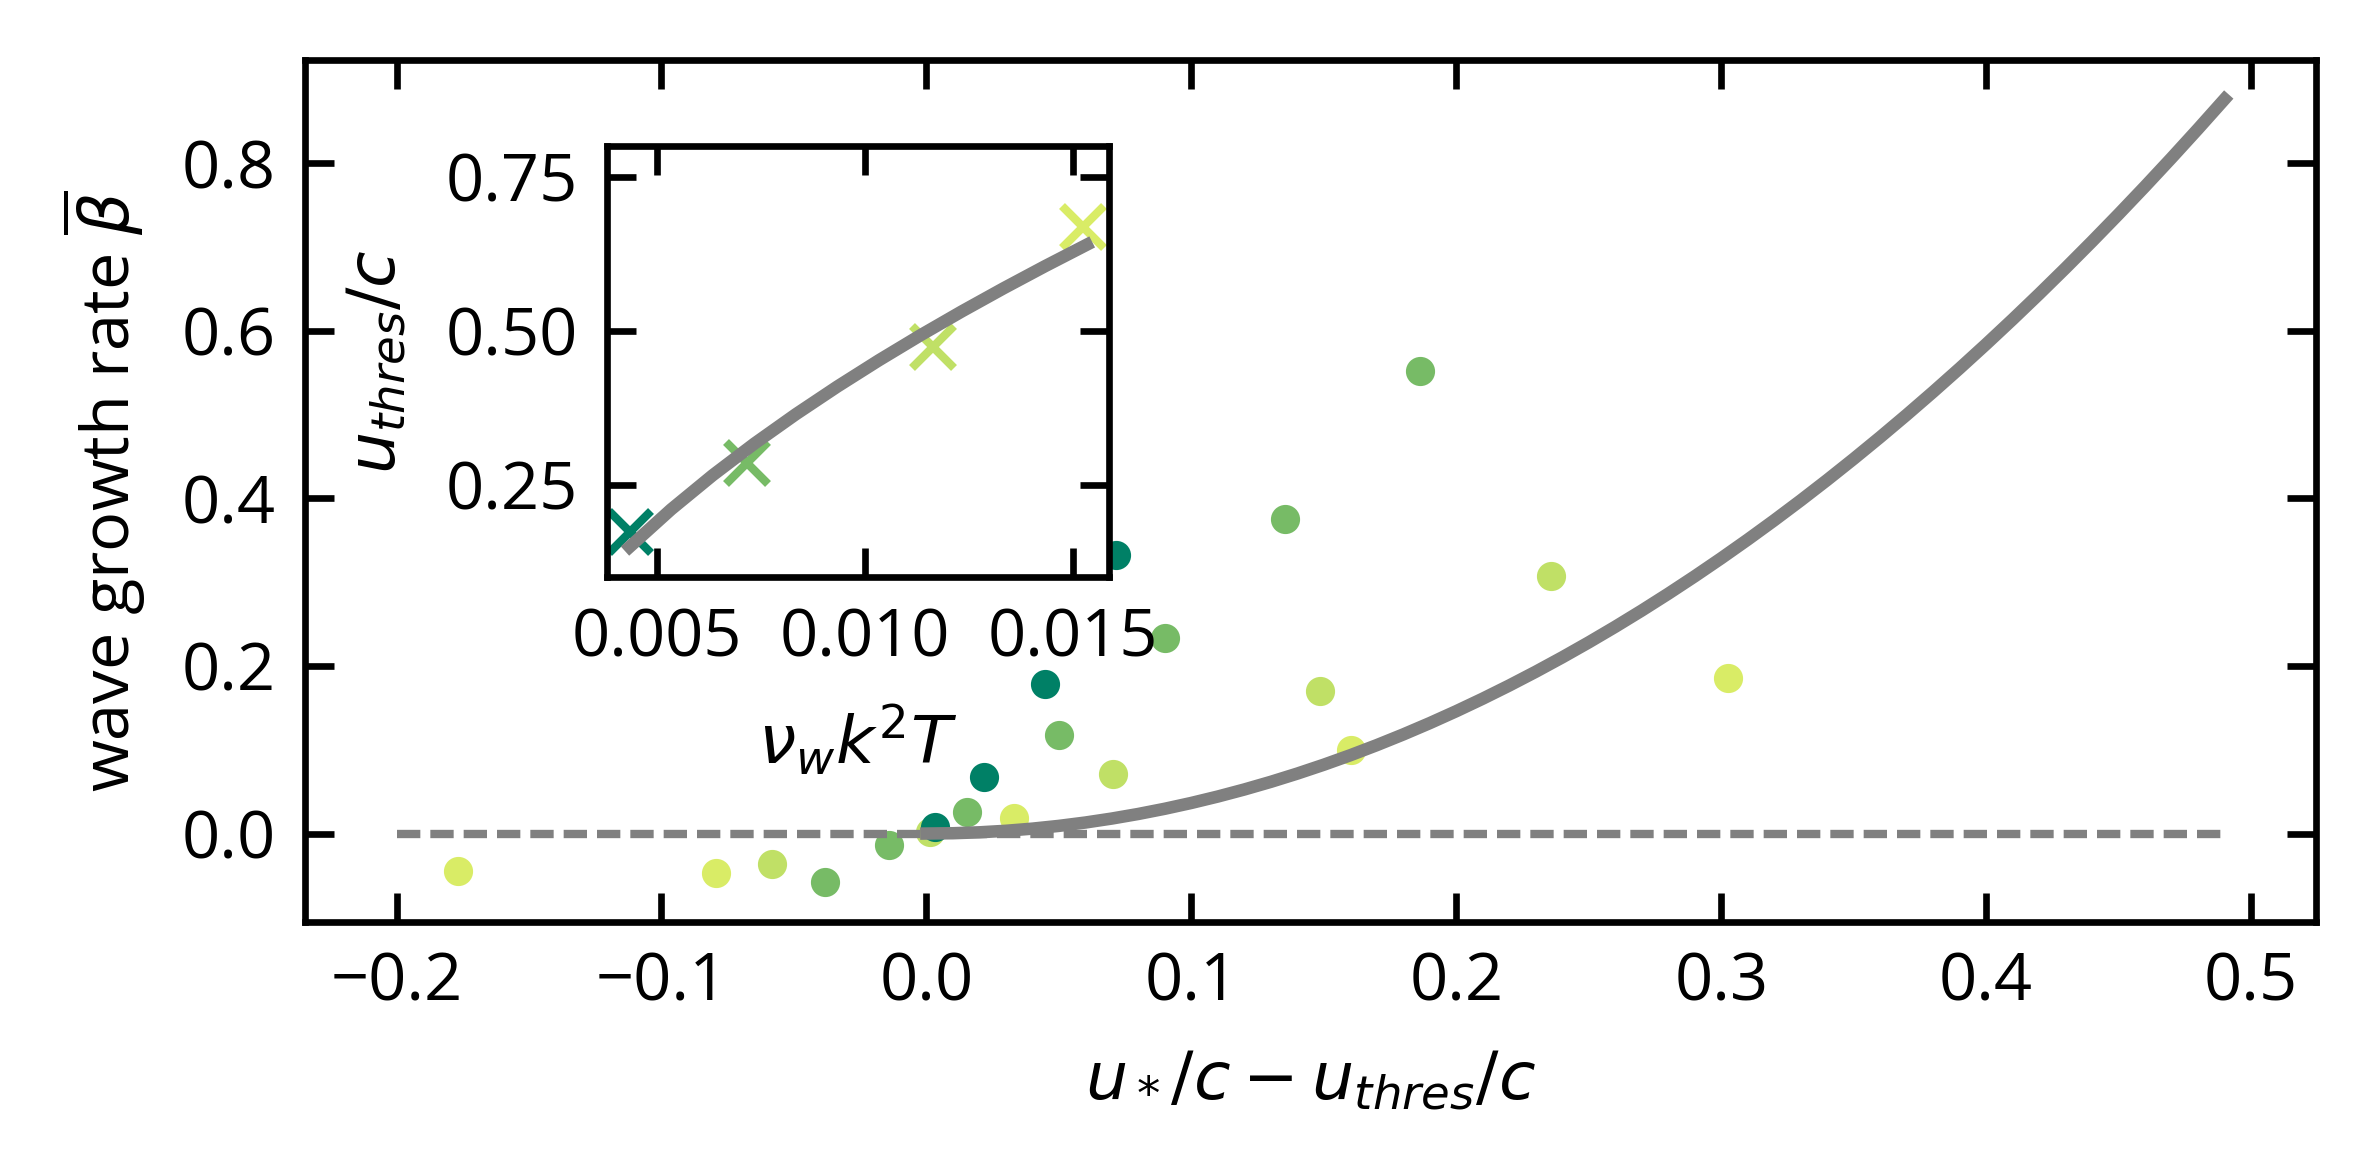

In [37]:
"""Plot the ensemble wave growth rate - exponential fit (as function of u* instead of u*/c) """
fig = plt.figure(figsize=[4,2]); ax1 = plt.gca()
ustar_ = []; wa_ = []
for REdict in dict_ensemble:
    for case in case_ensemble:
        if case.Re == REdict["Re"]:
            plt.plot((case.ustar*case.wave.c)**2-REdict["thres"]**2,case.wa,'.',color=plt.cm.get_cmap('summer')(1-case.Re/20000))
            ustar_.append(case.ustar*case.wave.c-REdict["thres"]); wa_.append(case.wa)
            REdict["ustar"].append(case.ustar*case.wave.c); REdict["rate"].append(case.wa)
plt.ylabel(r'wave growth rate $\overline{\beta}$')
plt.xlabel(r'$u_*/c-u_{thres}/c$')
ustar_plot = np.arange(-0.2,0.5,0.01)
plt.plot(ustar_plot,np.zeros(ustar_plot.shape),'--',color='gray',linewidth=1)
z = np.polyfit(np.array(ustar_), np.array(wa_), 2); p = np.poly1d(z)
ustar_plot = np.arange(0,0.5,0.01)
# plt.plot(ustar_plot,p(ustar_plot), color='gray')
plt.plot(ustar_plot,3.65*ustar_plot**2, color='gray')
plt.tight_layout()
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
# Create a set of inset Axes: these should fill the bounding box allocated to them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.15,0.4,0.25,0.5])
ax2.set_axes_locator(ip)
Re_ = np.zeros(4); u_thres_ = np.zeros(4); omega = np.zeros(4); k = np.zeros(4);
for (i,REdict) in enumerate(dict_ensemble):
    Re_[i] = REdict["Re"]; u_thres_[i] = REdict["thres"]; omega[i] = REdict["omega"]; k[i] = REdict["k"];
    ax2.plot(1/REdict["Re"]*REdict["k"]**2*2*np.pi/REdict["omega"], REdict["thres"], 'x', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000))
var = 1/Re_*k**2*2*np.pi/omega
z = np.polyfit(var**0.5, u_thres_, 1); p = np.poly1d(z)
var_ = np.arange(var[-1],var[0]+0.001,0.001)
ax2.plot(var_,p(var_**0.5), color='gray')
# ax2.text(5000,0.7,r'$%.2f\sqrt{\frac{\nu k^2}{\omega}} %.2f$'%(z[0],z[1]),fontsize=8)
# RE_plot = np.arange(1000,25000,1)
# z = np.polyfit((1/Re_)**0.5, u_thres_, 1); p = np.poly1d(z)
# ax2.plot(Re_plot, p((1/Re_plot)**0.5), '--', color='k')
# ax2.text(5000,0.7,r'$%.2f\sqrt{1/Re} + %.2f$'%(z[0],z[1]),fontsize=8)
ax2.set_ylim([0.1,0.8]);
ax2.set_xlabel(r'$\nu_w k^2T$'); ax2.set_ylabel(r'$u_{thres}/c$')
# fig.savefig(working_dir+'plots/wave_growth_2.eps', bbox_inches='tight', pad_inches=0.1)

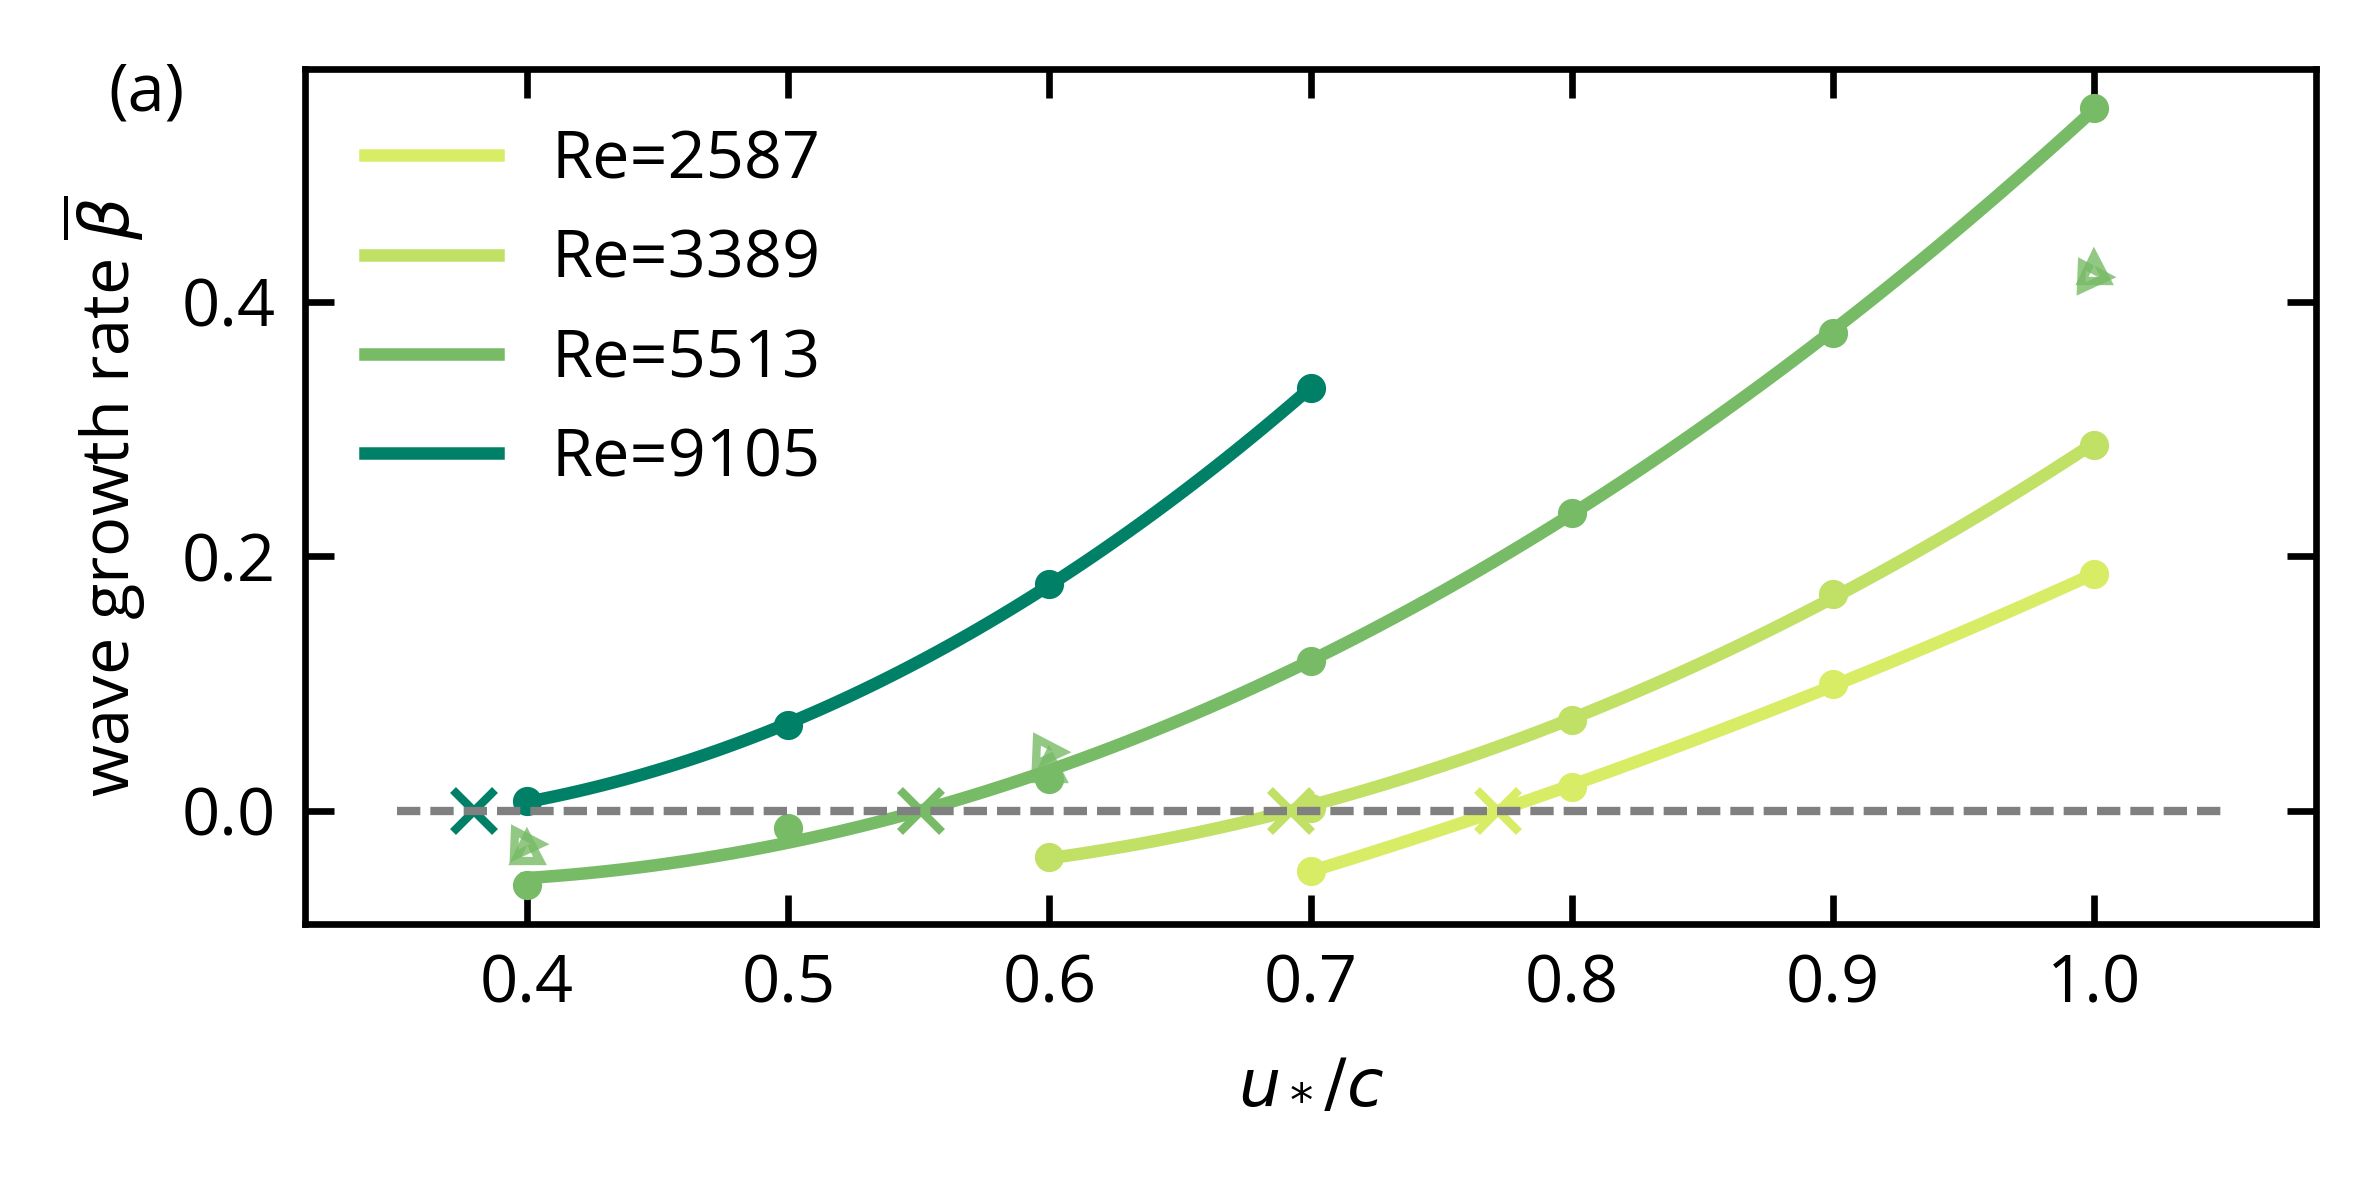

In [34]:
'''Plot the ensemble wave growth rate - exponential fit'''
fig = plt.figure(figsize=[4,2])
dict1 = {"Re":2990, "ustar":[], "rate":[], "omega":case_ensemble[0].wave.omega, "k":case_ensemble[0].wave.k}
dict2 = {"Re":5000, "ustar":[], "rate":[], "omega":case_ensemble[5].wave.omega, "k":case_ensemble[5].wave.k}
dict3 = {"Re":10660, "ustar":[], "rate":[], "omega":case_ensemble[10].wave.omega, "k":case_ensemble[10].wave.k}
dict4 = {"Re":20000, "ustar":[], "rate":[], "omega":case_ensemble[17].wave.omega, "k":case_ensemble[17].wave.k}
dict_ensemble = [dict1,dict2,dict3,dict4]
for REdict in dict_ensemble:
    for case in case_ensemble[1:]:
        if case.Re == REdict["Re"]:
            plt.plot(case.ustar,case.wa,'.',color=plt.cm.get_cmap('summer')(1-case.Re/20000))
            REdict["ustar"].append(case.ustar); REdict["rate"].append(case.wa)
for REdict in dict_ensemble:
    ustar = np.array(REdict["ustar"]); rate = np.array(REdict["rate"])
    z = np.polyfit(ustar, rate, 2); p = np.poly1d(z)
    ustar_plot = np.linspace(ustar[0],ustar[-1],100, endpoint=True)
    plt.plot(ustar_plot, p(ustar_plot), '-', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000),label='Re=%.0f' %(REdict['Re']*REdict['omega']/REdict['k']))
    REdict["thres"] = np.max(np.roots(p))
    plt.plot(REdict["thres"], 0, 'x', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000))

# Add the two Bo = 25 & 200 cases
dict1 = {"Bo":1.47, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[0].wave.omega, "k":case_Bo[0].wave.k}
dict2 = {"Bo":25, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[3].wave.omega, "k":case_Bo[3].wave.k}
dict3 = {"Bo":200, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[6].wave.omega, "k":case_Bo[6].wave.k}
dict_ensemble2 = [dict2,dict3]
line = ['--', ':']; marker = ['^','>']
for i, BOdict in enumerate(dict_ensemble2):
    for case in case_Bo:
        if case.Bo == BOdict["Bo"]:
            plt.plot(case.ustar, case.wa, marker[i], fillstyle = 'none', markersize=3, alpha = 0.8,
                     color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000))
            BOdict["ustar"].append(case.ustar); BOdict["rate"].append(case.wa) 
            BOdict["rate_nonfilter"].append(case.wa_nonfilter)
            
for i, BOdict in enumerate(dict_ensemble2):
    ustar = np.array(BOdict["ustar"]); rate = np.array(BOdict["rate"])
    z = np.polyfit(ustar, rate, 2); p = np.poly1d(z)
    ustar_plot = np.linspace(ustar[0],ustar[-1], 100, endpoint=True)
    #plt.plot(ustar_plot,p(ustar_plot), color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000), linestyle=line[i], alpha = 0.5)
    BOdict["thres"] = np.max(np.roots(p))
    #plt.plot(BOdict["thres"], 0, 'x', color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000))

plt.ylabel(r'wave growth rate $\overline{\beta}$')
plt.xlabel(r'$u_*/c$')
ustar_plot = np.linspace(0.35,1.05,100)
plt.plot(ustar_plot,np.zeros(ustar_plot.shape),'--',color='gray',linewidth=1)
# plt.errorbar(0.7, 0.08, xerr=0.7*0.2, marker='*', color='k')
plt.legend()
plt.tight_layout()
plt.text(0.05, 0.9, '(a)', transform=plt.gcf().transFigure)
fig.savefig(working_dir+'plots/rev_wave_growth_a.pdf', bbox_inches='tight', pad_inches=0.1)

[ 0.50630488 -0.0812454  -0.2390027 ]
-0.08023366840273641
0.8652269617181957
[ 1.33640344 -1.32258167  0.27498365]
-0.4948287407267242
0.6778254115539648
[ 1.45704072 -1.0333425   0.1271728 ]
-0.35460316381759943
0.5171301691662286
[ 2.33332633 -1.4818658   0.22622563]
-0.3175436246778921
0.45523401396436913
[ 1.09061192 -0.76766905  0.10332662]
[ 0.95531691 -0.59561749  0.0593255 ]


Text(0.05, 0.9, '(a)')

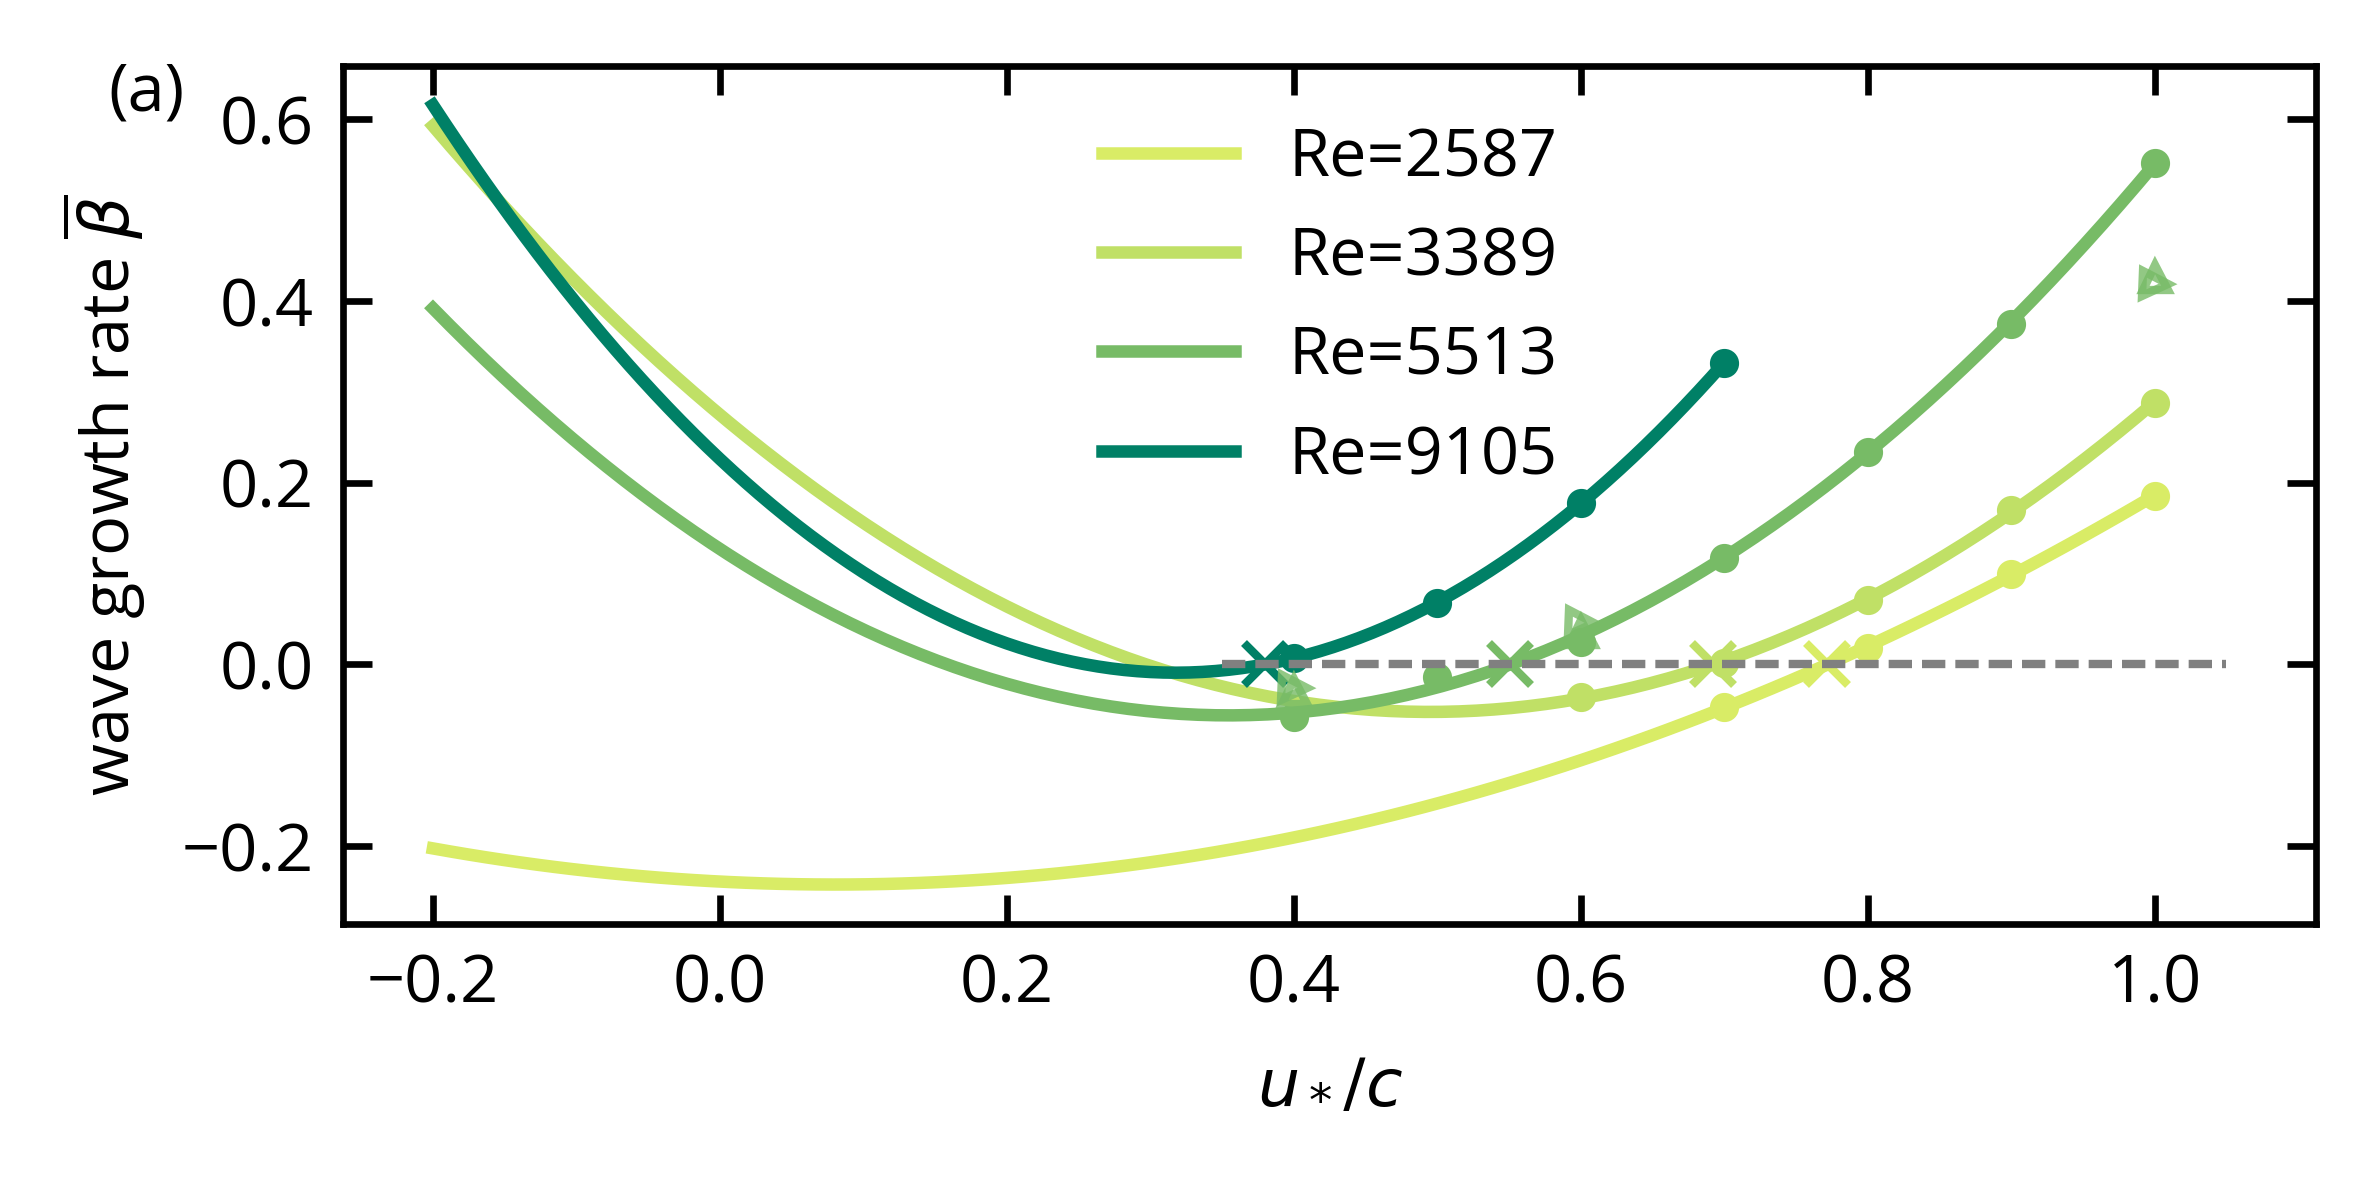

In [46]:
'''Plot the ensemble wave growth rate - exponential fit'''
fig = plt.figure(figsize=[4,2])
dict1 = {"Re":2990, "ustar":[], "rate":[], "omega":case_ensemble[0].wave.omega, "k":case_ensemble[0].wave.k}
dict2 = {"Re":5000, "ustar":[], "rate":[], "omega":case_ensemble[5].wave.omega, "k":case_ensemble[5].wave.k}
dict3 = {"Re":10660, "ustar":[], "rate":[], "omega":case_ensemble[10].wave.omega, "k":case_ensemble[10].wave.k}
dict4 = {"Re":20000, "ustar":[], "rate":[], "omega":case_ensemble[17].wave.omega, "k":case_ensemble[17].wave.k}
dict_ensemble = [dict1,dict2,dict3,dict4]
for REdict in dict_ensemble:
    for case in case_ensemble[1:]:
        if case.Re == REdict["Re"]:
            plt.plot(case.ustar,case.wa,'.',color=plt.cm.get_cmap('summer')(1-case.Re/20000))
            REdict["ustar"].append(case.ustar); REdict["rate"].append(case.wa)
for REdict in dict_ensemble:
    ustar = np.array(REdict["ustar"]); rate = np.array(REdict["rate"])
    z = np.polyfit(ustar, rate, 2); p = np.poly1d(z)
    print(z)
    print(z[1]/z[0]/2)
    print(REdict["omega"]/REdict["k"])
    ustar_plot = np.linspace(-0.2,ustar[-1], 100, endpoint=True)
#     ustar_plot = np.linspace(ustar[0],ustar[-1],100, endpoint=True)
    plt.plot(ustar_plot, p(ustar_plot), '-', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000),label='Re=%.0f' %(REdict['Re']*REdict['omega']/REdict['k']))
    REdict["thres"] = np.max(np.roots(p))
    plt.plot(REdict["thres"], 0, 'x', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000))

# Add the two Bo = 25 & 200 cases
dict1 = {"Bo":1.47, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[0].wave.omega, "k":case_Bo[0].wave.k}
dict2 = {"Bo":25, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[3].wave.omega, "k":case_Bo[3].wave.k}
dict3 = {"Bo":200, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[6].wave.omega, "k":case_Bo[6].wave.k}
dict_ensemble2 = [dict2,dict3]
line = ['--', ':']; marker = ['^','>']
for i, BOdict in enumerate(dict_ensemble2):
    for case in case_Bo:
        if case.Bo == BOdict["Bo"]:
            plt.plot(case.ustar, case.wa, marker[i], fillstyle = 'none', markersize=3, alpha = 0.8,
                     color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000))
            BOdict["ustar"].append(case.ustar); BOdict["rate"].append(case.wa) 
            BOdict["rate_nonfilter"].append(case.wa_nonfilter)
            
for i, BOdict in enumerate(dict_ensemble2):
    ustar = np.array(BOdict["ustar"]); rate = np.array(BOdict["rate"])
    z = np.polyfit(ustar, rate, 2); p = np.poly1d(z)
    print(z)
    ustar_plot = np.linspace(ustar[0],ustar[-1], 100, endpoint=True)
    #plt.plot(ustar_plot,p(ustar_plot), color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000), linestyle=line[i], alpha = 0.5)
    BOdict["thres"] = np.max(np.roots(p))
    #plt.plot(BOdict["thres"], 0, 'x', color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000))

plt.ylabel(r'wave growth rate $\overline{\beta}$')
plt.xlabel(r'$u_*/c$')
ustar_plot = np.linspace(0.35,1.05,100)
plt.plot(ustar_plot,np.zeros(ustar_plot.shape),'--',color='gray',linewidth=1)
# plt.errorbar(0.7, 0.08, xerr=0.7*0.2, marker='*', color='k')
plt.legend()
plt.tight_layout()
plt.text(0.05, 0.9, '(a)', transform=plt.gcf().transFigure)
# fig.savefig(working_dir+'plots/rev_wave_growth_a.pdf', bbox_inches='tight', pad_inches=0.1)

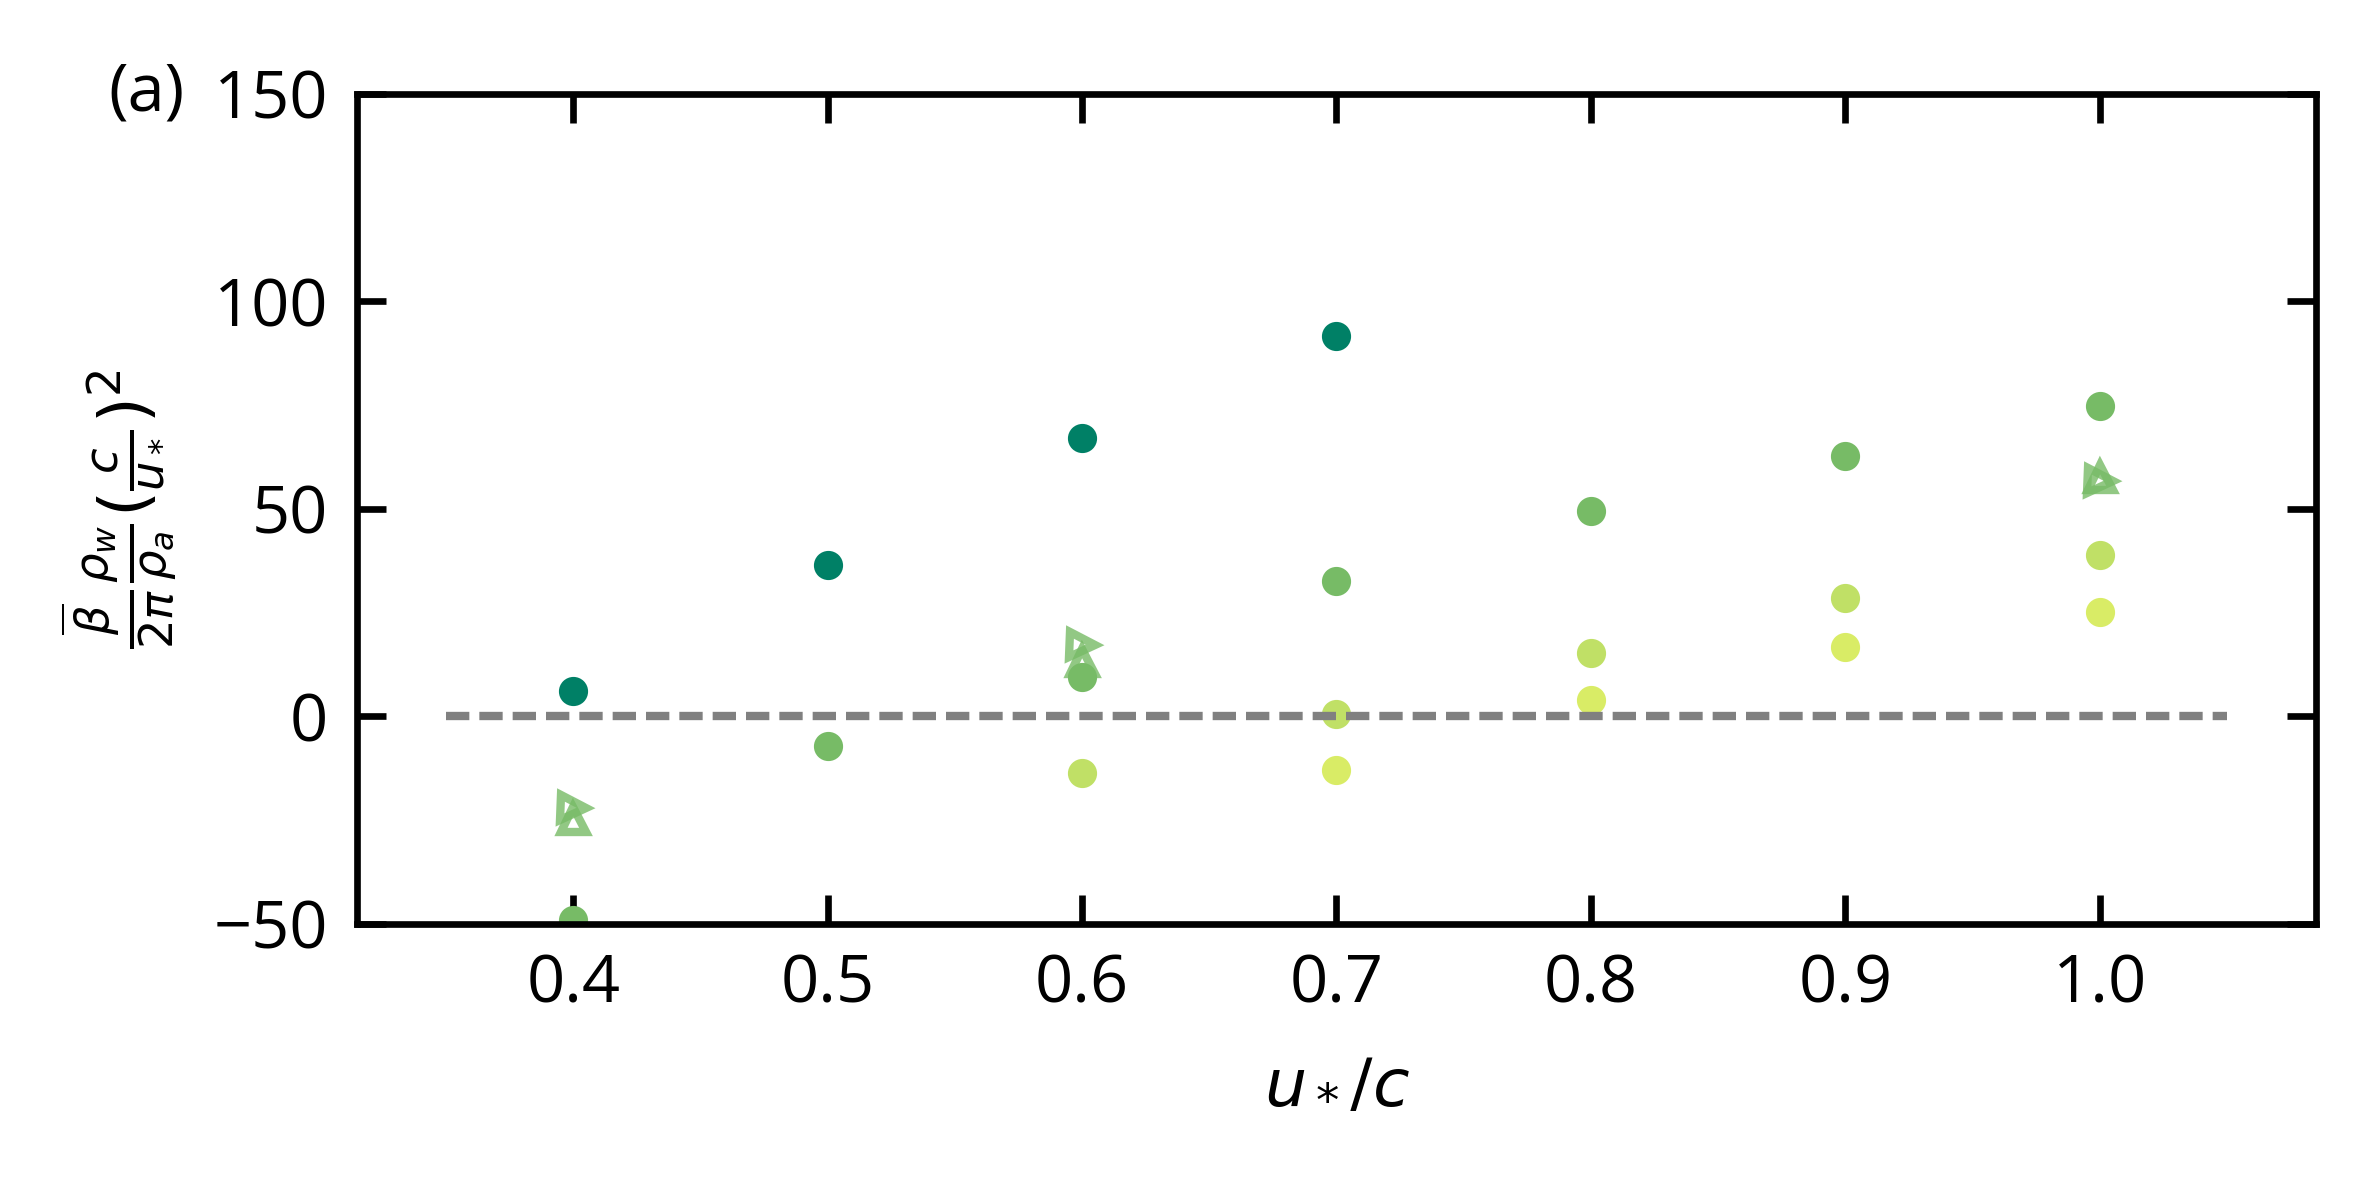

In [40]:
'''Plot the ensemble wave growth rate - estimation of the prefactor alpha'''
fig = plt.figure(figsize=[4,2])
dict1 = {"Re":2990, "ustar":[], "rate":[], "omega":case_ensemble[0].wave.omega, "k":case_ensemble[0].wave.k}
dict2 = {"Re":5000, "ustar":[], "rate":[], "omega":case_ensemble[5].wave.omega, "k":case_ensemble[5].wave.k}
dict3 = {"Re":10660, "ustar":[], "rate":[], "omega":case_ensemble[10].wave.omega, "k":case_ensemble[10].wave.k}
dict4 = {"Re":20000, "ustar":[], "rate":[], "omega":case_ensemble[17].wave.omega, "k":case_ensemble[17].wave.k}
dict_ensemble = [dict1,dict2,dict3,dict4]
for REdict in dict_ensemble:
    for case in case_ensemble[1:]:
        if case.Re == REdict["Re"]:
            plt.plot(case.ustar,case.wa/(2*np.pi)*850/case.ustar**2,'.',color=plt.cm.get_cmap('summer')(1-case.Re/20000))
            REdict["ustar"].append(case.ustar); REdict["rate"].append(case.wa)
# for REdict in dict_ensemble:
#     ustar = np.array(REdict["ustar"]); rate = np.array(REdict["rate"])
#     z = np.polyfit(ustar, rate, 2); p = np.poly1d(z)
#     ustar_plot = np.linspace(ustar[0],ustar[-1],100, endpoint=True)
#     plt.plot(ustar_plot, p(ustar_plot), '-', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000),label='Re=%.0f' %(REdict['Re']*REdict['omega']/REdict['k']))
#     REdict["thres"] = np.max(np.roots(p))
#     plt.plot(REdict["thres"], 0, 'x', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000))

# Add the two Bo = 25 & 200 cases
dict1 = {"Bo":1.47, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[0].wave.omega, "k":case_Bo[0].wave.k}
dict2 = {"Bo":25, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[3].wave.omega, "k":case_Bo[3].wave.k}
dict3 = {"Bo":200, "Re":10660, "ustar":[], "rate":[], "rate_nonfilter":[], "omega":case_Bo[6].wave.omega, "k":case_Bo[6].wave.k}
dict_ensemble2 = [dict2,dict3]
line = ['--', ':']; marker = ['^','>']
for i, BOdict in enumerate(dict_ensemble2):
    for case in case_Bo:
        if case.Bo == BOdict["Bo"]:
            plt.plot(case.ustar, case.wa/(2*np.pi)*850/case.ustar**2, marker[i], fillstyle = 'none', markersize=3, alpha = 0.8,
                     color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000))
            BOdict["ustar"].append(case.ustar); BOdict["rate"].append(case.wa) 
            BOdict["rate_nonfilter"].append(case.wa_nonfilter)
            
for i, BOdict in enumerate(dict_ensemble2):
    ustar = np.array(BOdict["ustar"]); rate = np.array(BOdict["rate"])
    z = np.polyfit(ustar, rate, 2); p = np.poly1d(z)
    ustar_plot = np.linspace(ustar[0],ustar[-1], 100, endpoint=True)
    #plt.plot(ustar_plot,p(ustar_plot), color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000), linestyle=line[i], alpha = 0.5)
    BOdict["thres"] = np.max(np.roots(p))
    #plt.plot(BOdict["thres"], 0, 'x', color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000))

plt.ylabel(r'$\frac{\overline{\beta}}{2\pi}\frac{\rho_w}{\rho_a}(\frac{c}{u_*})^2$')
plt.xlabel(r'$u_*/c$')
ustar_plot = np.linspace(0.35,1.05,100)
plt.plot(ustar_plot,np.zeros(ustar_plot.shape),'--',color='gray',linewidth=1)
# plt.errorbar(0.7, 0.08, xerr=0.7*0.2, marker='*', color='k')
plt.ylim([-50,150])
plt.tight_layout()
plt.text(0.05, 0.9, '(a)', transform=plt.gcf().transFigure)
fig.savefig(working_dir+'plots/rev_wave_growth_check1.pdf', bbox_inches='tight', pad_inches=0.1)

/home/jiarong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/jiarong/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/jiarong/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


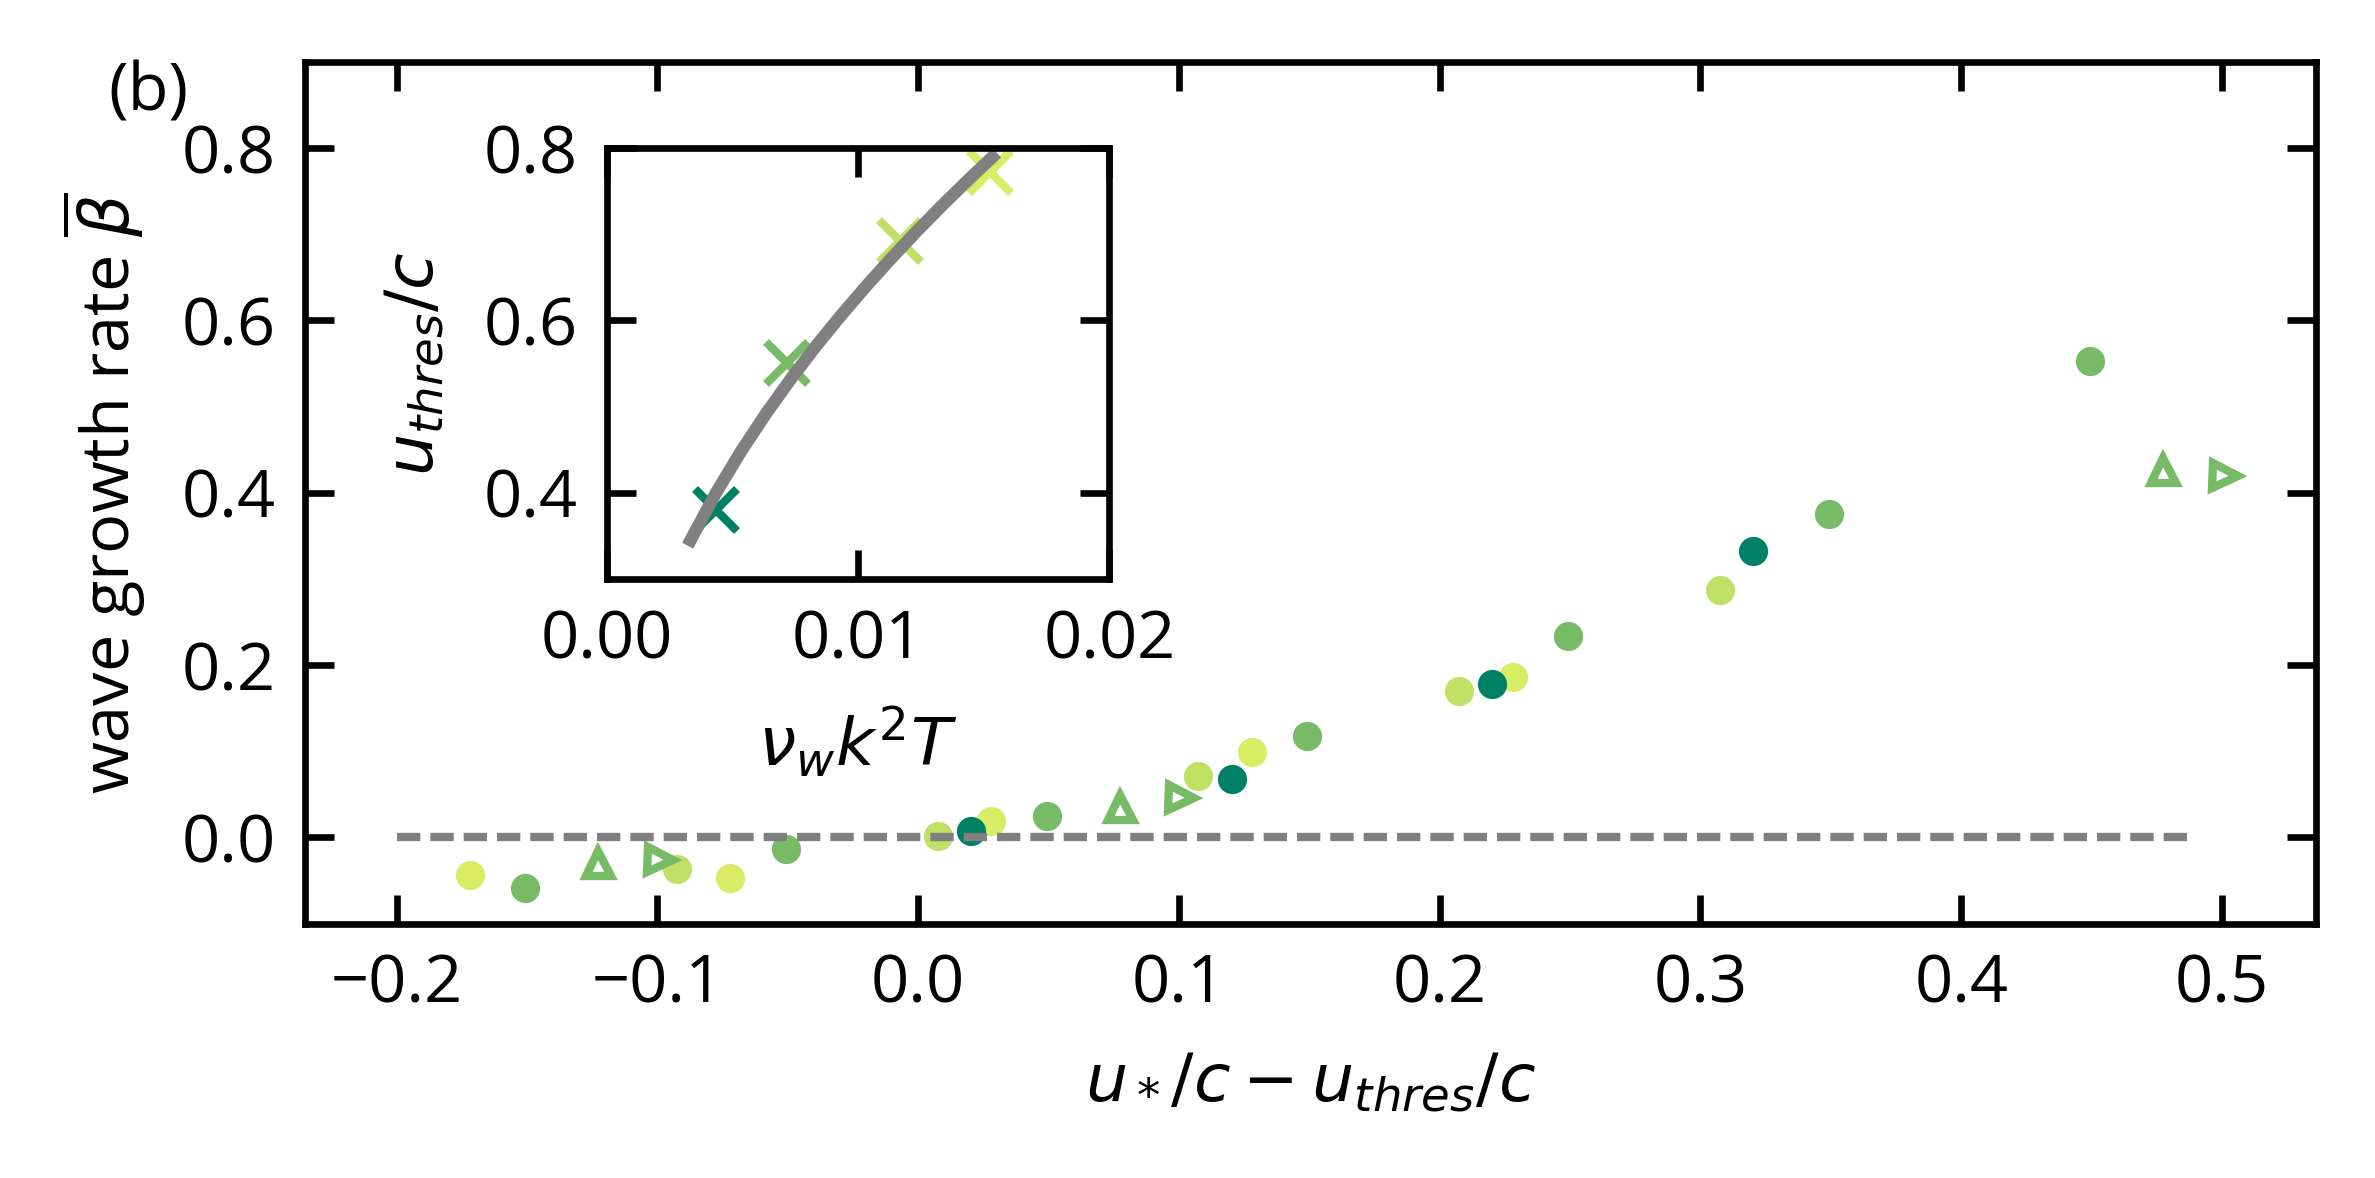

In [50]:
"""Plot the ensemble wave growth rate - exponential fit"""
fig = plt.figure(figsize=[4,2]); ax1 = plt.gca()
ustar_ = []; wa_ = []
for REdict in dict_ensemble:
    for case in case_ensemble:
        if case.Re == REdict["Re"]:
            plt.plot(case.ustar-REdict["thres"],case.wa,'.',color=plt.cm.get_cmap('summer')(1-case.Re/20000))
            ustar_.append(case.ustar-REdict["thres"]); wa_.append(case.wa)
            REdict["ustar"].append(case.ustar); REdict["rate"].append(case.wa)
            
# Add the Bond number
for i, BOdict in enumerate(dict_ensemble2):
    for case in case_Bo:
        if case.Bo == BOdict["Bo"]:
            plt.plot(case.ustar-BOdict["thres"], case.wa, marker[i], fillstyle = 'none', markersize=3, alpha = 1,
                     color=plt.cm.get_cmap('summer')(1-BOdict["Re"]/20000))
            BOdict["ustar"].append(case.ustar); BOdict["rate"].append(case.wa) 
            BOdict["rate_nonfilter"].append(case.wa_nonfilter)

plt.ylabel(r'wave growth rate $\overline{\beta}$')
plt.xlabel(r'$u_*/c-u_{thres}/c$')
ustar_plot = np.arange(-0.2,0.5,0.01)
plt.plot(ustar_plot,np.zeros(ustar_plot.shape),'--',color='gray',linewidth=1)
z = np.polyfit(np.array(ustar_), np.array(wa_), 2); p = np.poly1d(z)
ustar_plot = np.arange(0,0.5,0.01)
# plt.plot(ustar_plot,p(ustar_plot), color='gray')
# plt.plot(ustar_plot, 3.5*ustar_plot**2, '-', color='gray')
# plt.plot(ustar_plot, 1.2*ustar_plot, '-', color='gray')
plt.tight_layout()

"""Inset showing threshold."""
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
# Create a set of inset Axes: these should fill the bounding box allocated to them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.15,0.4,0.25,0.5])
ax2.set_axes_locator(ip)
Re_ = np.zeros(4); u_thres_ = np.zeros(4); omega = np.zeros(4); k = np.zeros(4);
for (i,REdict) in enumerate(dict_ensemble):
    Re_[i] = REdict["Re"]; u_thres_[i] = REdict["thres"]; omega[i] = REdict["omega"]; k[i] = REdict["k"];
    ax2.plot(1/REdict["Re"]*REdict["k"]**2*2*np.pi/REdict["omega"], REdict["thres"], 'x', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000))
var = 1/Re_*k**2*2*np.pi/omega
z = np.polyfit(var**0.5, u_thres_, 1); p = np.poly1d(z)
var_ = np.arange(var[-1]-0.001,var[0]+0.001,0.001)
ax2.plot(var_, p(var_**0.5), '-', color='gray')
# ax2.errorbar(10**(-6)*(2*np.pi/0.04)**2*0.147,0.15/0.27, yerr=0.15/0.27*0.2, marker='*', color='k')
# ax2.text(5000,0.7,r'$%.2f\sqrt{\frac{\nu k^2}{\omega}} %.2f$'%(z[0],z[1]),fontsize=8)
# RE_plot = np.arange(1000,25000,1)
# z = np.polyfit((1/Re_)**0.5, u_thres_, 1); p = np.poly1d(z)
# ax2.plot(Re_plot, p((1/Re_plot)**0.5), '--', color='k')
# ax2.text(5000,0.7,r'$%.2f\sqrt{1/Re} + %.2f$'%(z[0],z[1]),fontsize=8)
ax1.set_ylim([-0.1,0.9])
ax2.set_ylim([0.3,0.8]); ax2.set_xlim([0,0.02]);
ax2.set_xlabel(r'$\nu_w k^2T$'); ax2.set_ylabel(r'$u_{thres}/c$')
plt.text(0.05, 0.9, '(b)', transform=plt.gcf().transFigure)
fig.savefig(working_dir+'plots/rev_wave_growth_b_alter.pdf', bbox_inches='tight', pad_inches=0.1)

 
6.727 x - 0.04354


/home/jiarong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


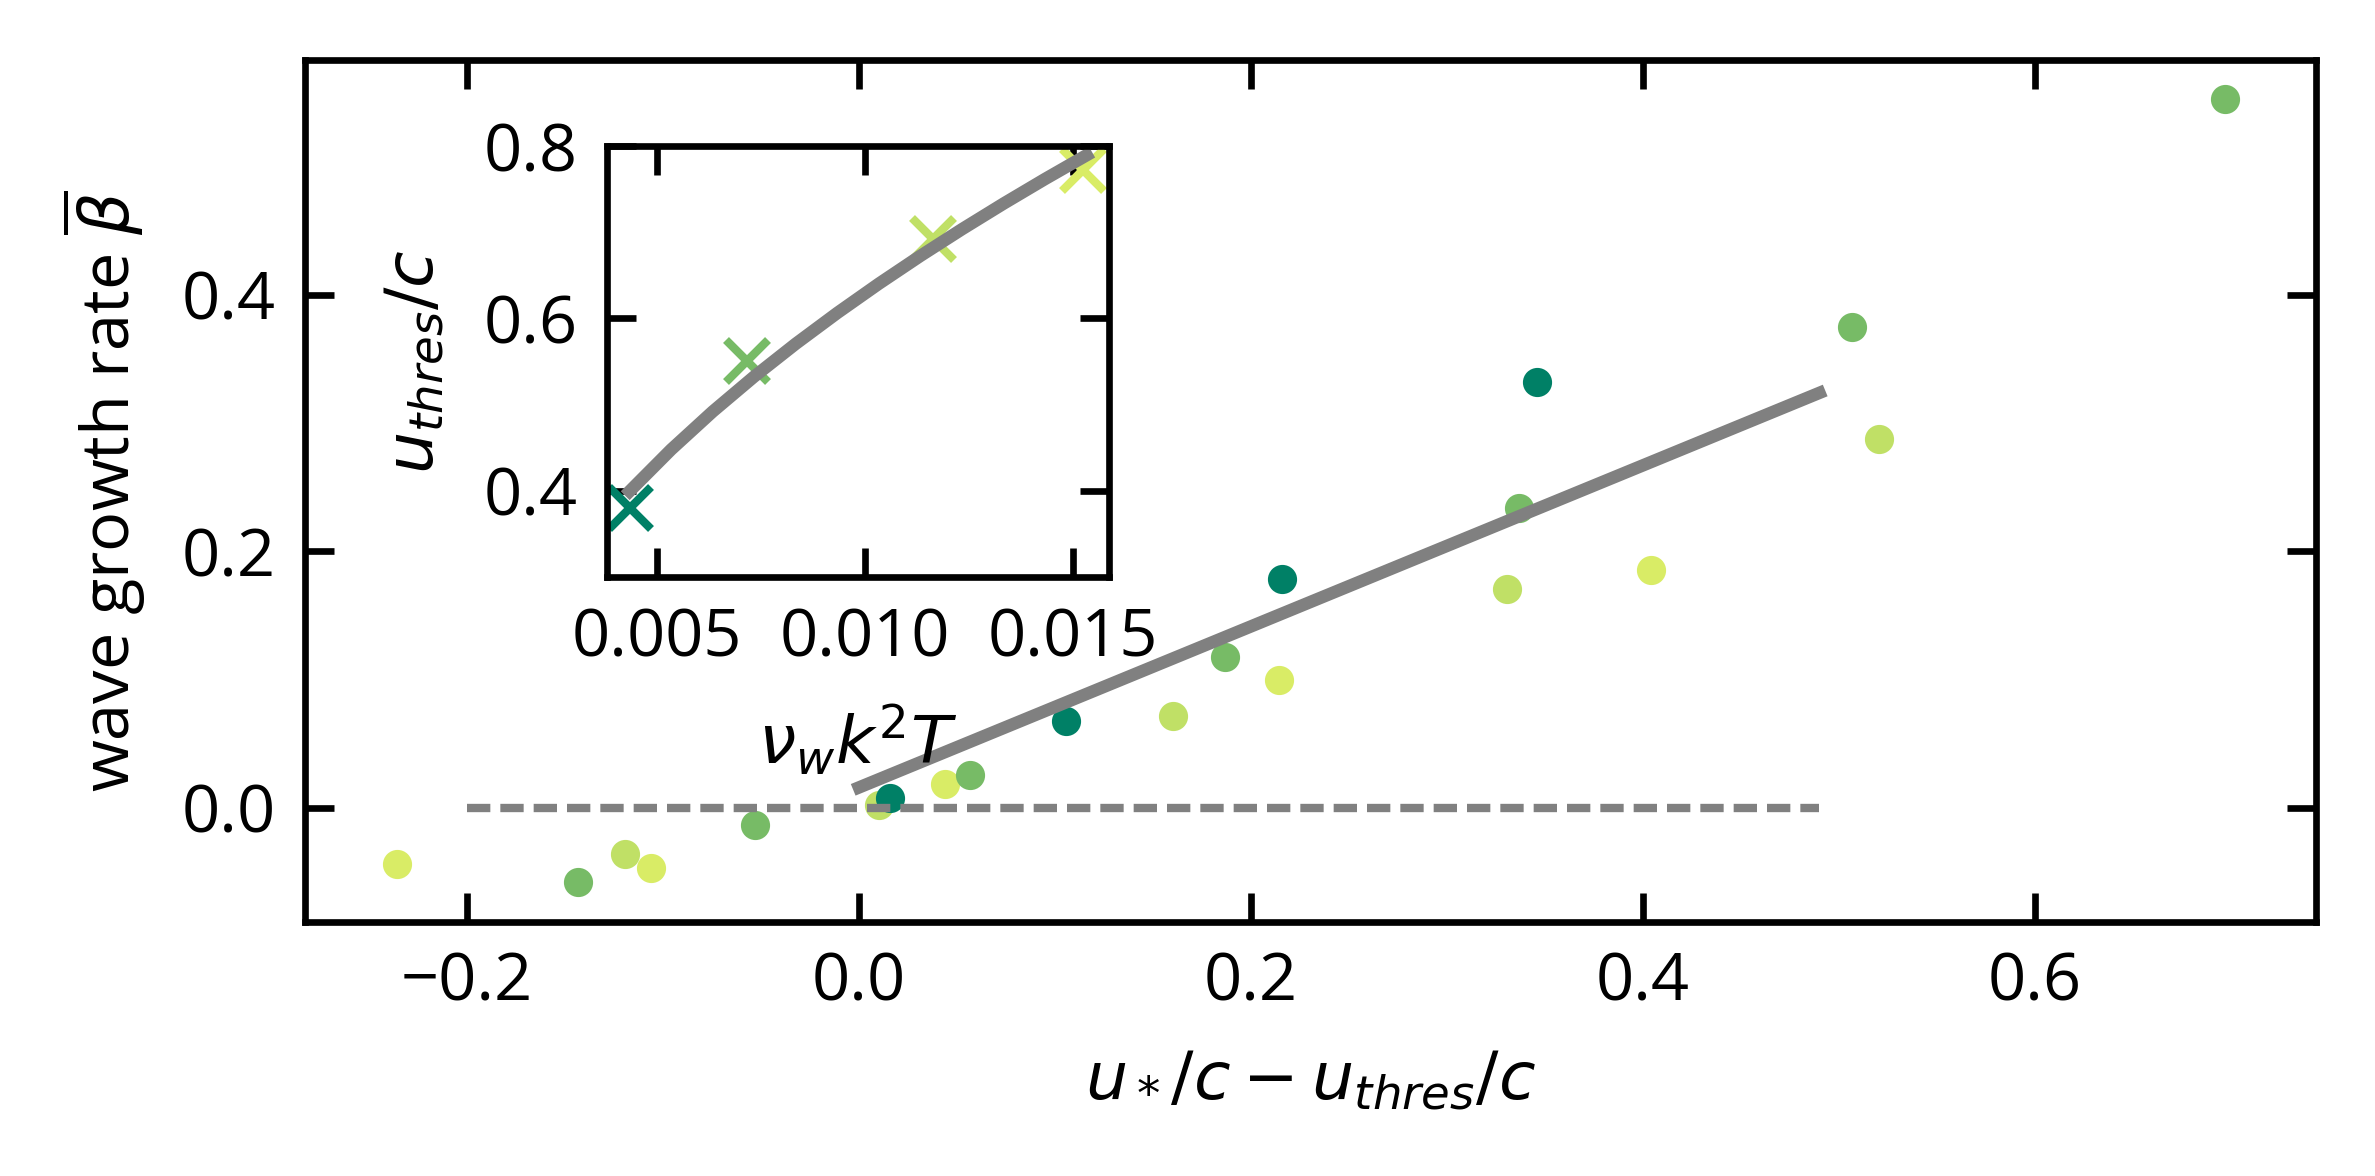

In [43]:
'''Plot the ensemble wave growth rate - exponential fit'''
fig = plt.figure(figsize=[4,2]); ax1 = plt.gca()
ustar_ = []; wa_ = []
for REdict in dict_ensemble:
    for case in case_ensemble:
        if case.Re == REdict["Re"]:
            plt.plot(1.*case.ustar**2-REdict["thres"]**2,case.wa,'.',color=plt.cm.get_cmap('summer')(1-case.Re/20000))
            ustar_.append(case.ustar**2-REdict["thres"]**2); wa_.append(case.wa)
            REdict["ustar"].append(case.ustar); REdict["rate"].append(case.wa)
plt.ylabel(r'wave growth rate $\overline{\beta}$')
plt.xlabel(r'$u_*/c-u_{thres}/c$')
ustar_plot = np.arange(-0.2,0.5,0.01)
plt.plot(ustar_plot,np.zeros(ustar_plot.shape),'--',color='gray',linewidth=1)
z = np.polyfit(np.array(ustar_), np.array(wa_), 1); p = np.poly1d(z)
ustar_plot = np.arange(0,0.5,0.01)
plt.plot(ustar_plot,p(ustar_plot), color='gray')
# plt.plot(ustar_plot,3.65*ustar_plot**2, color='gray')
plt.tight_layout()
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
# Create a set of inset Axes: these should fill the bounding box allocated to them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.15,0.4,0.25,0.5])
ax2.set_axes_locator(ip)
Re_ = np.zeros(4); u_thres_ = np.zeros(4); omega = np.zeros(4); k = np.zeros(4);
for (i,REdict) in enumerate(dict_ensemble):
    Re_[i] = REdict["Re"]; u_thres_[i] = REdict["thres"]; omega[i] = REdict["omega"]; k[i] = REdict["k"];
    ax2.plot(1/REdict["Re"]*REdict["k"]**2*2*np.pi/REdict["omega"], REdict["thres"], 'x', color=plt.cm.get_cmap('summer')(1-REdict["Re"]/20000))
var = 1/Re_*k**2*2*np.pi/omega
z = np.polyfit(var**0.5, u_thres_, 1); p = np.poly1d(z)
var_ = np.arange(var[-1],var[0]+0.001,0.001)
ax2.plot(var_,p(var_**0.5), color='gray')
print(p)
# ax2.text(5000,0.7,r'$%.2f\sqrt{\frac{\nu k^2}{\omega}} %.2f$'%(z[0],z[1]),fontsize=8)
# RE_plot = np.arange(1000,25000,1)
# z = np.polyfit((1/Re_)**0.5, u_thres_, 1); p = np.poly1d(z)
# ax2.plot(Re_plot, p((1/Re_plot)**0.5), '--', color='k')
# ax2.text(5000,0.7,r'$%.2f\sqrt{1/Re} + %.2f$'%(z[0],z[1]),fontsize=8)
ax2.set_ylim([0.3,0.8]);
ax2.set_xlabel(r'$\nu_w k^2T$'); ax2.set_ylabel(r'$u_{thres}/c$')
fig.savefig(working_dir+'plots/wave_growth_2.eps', bbox_inches='tight', pad_inches=0.1)

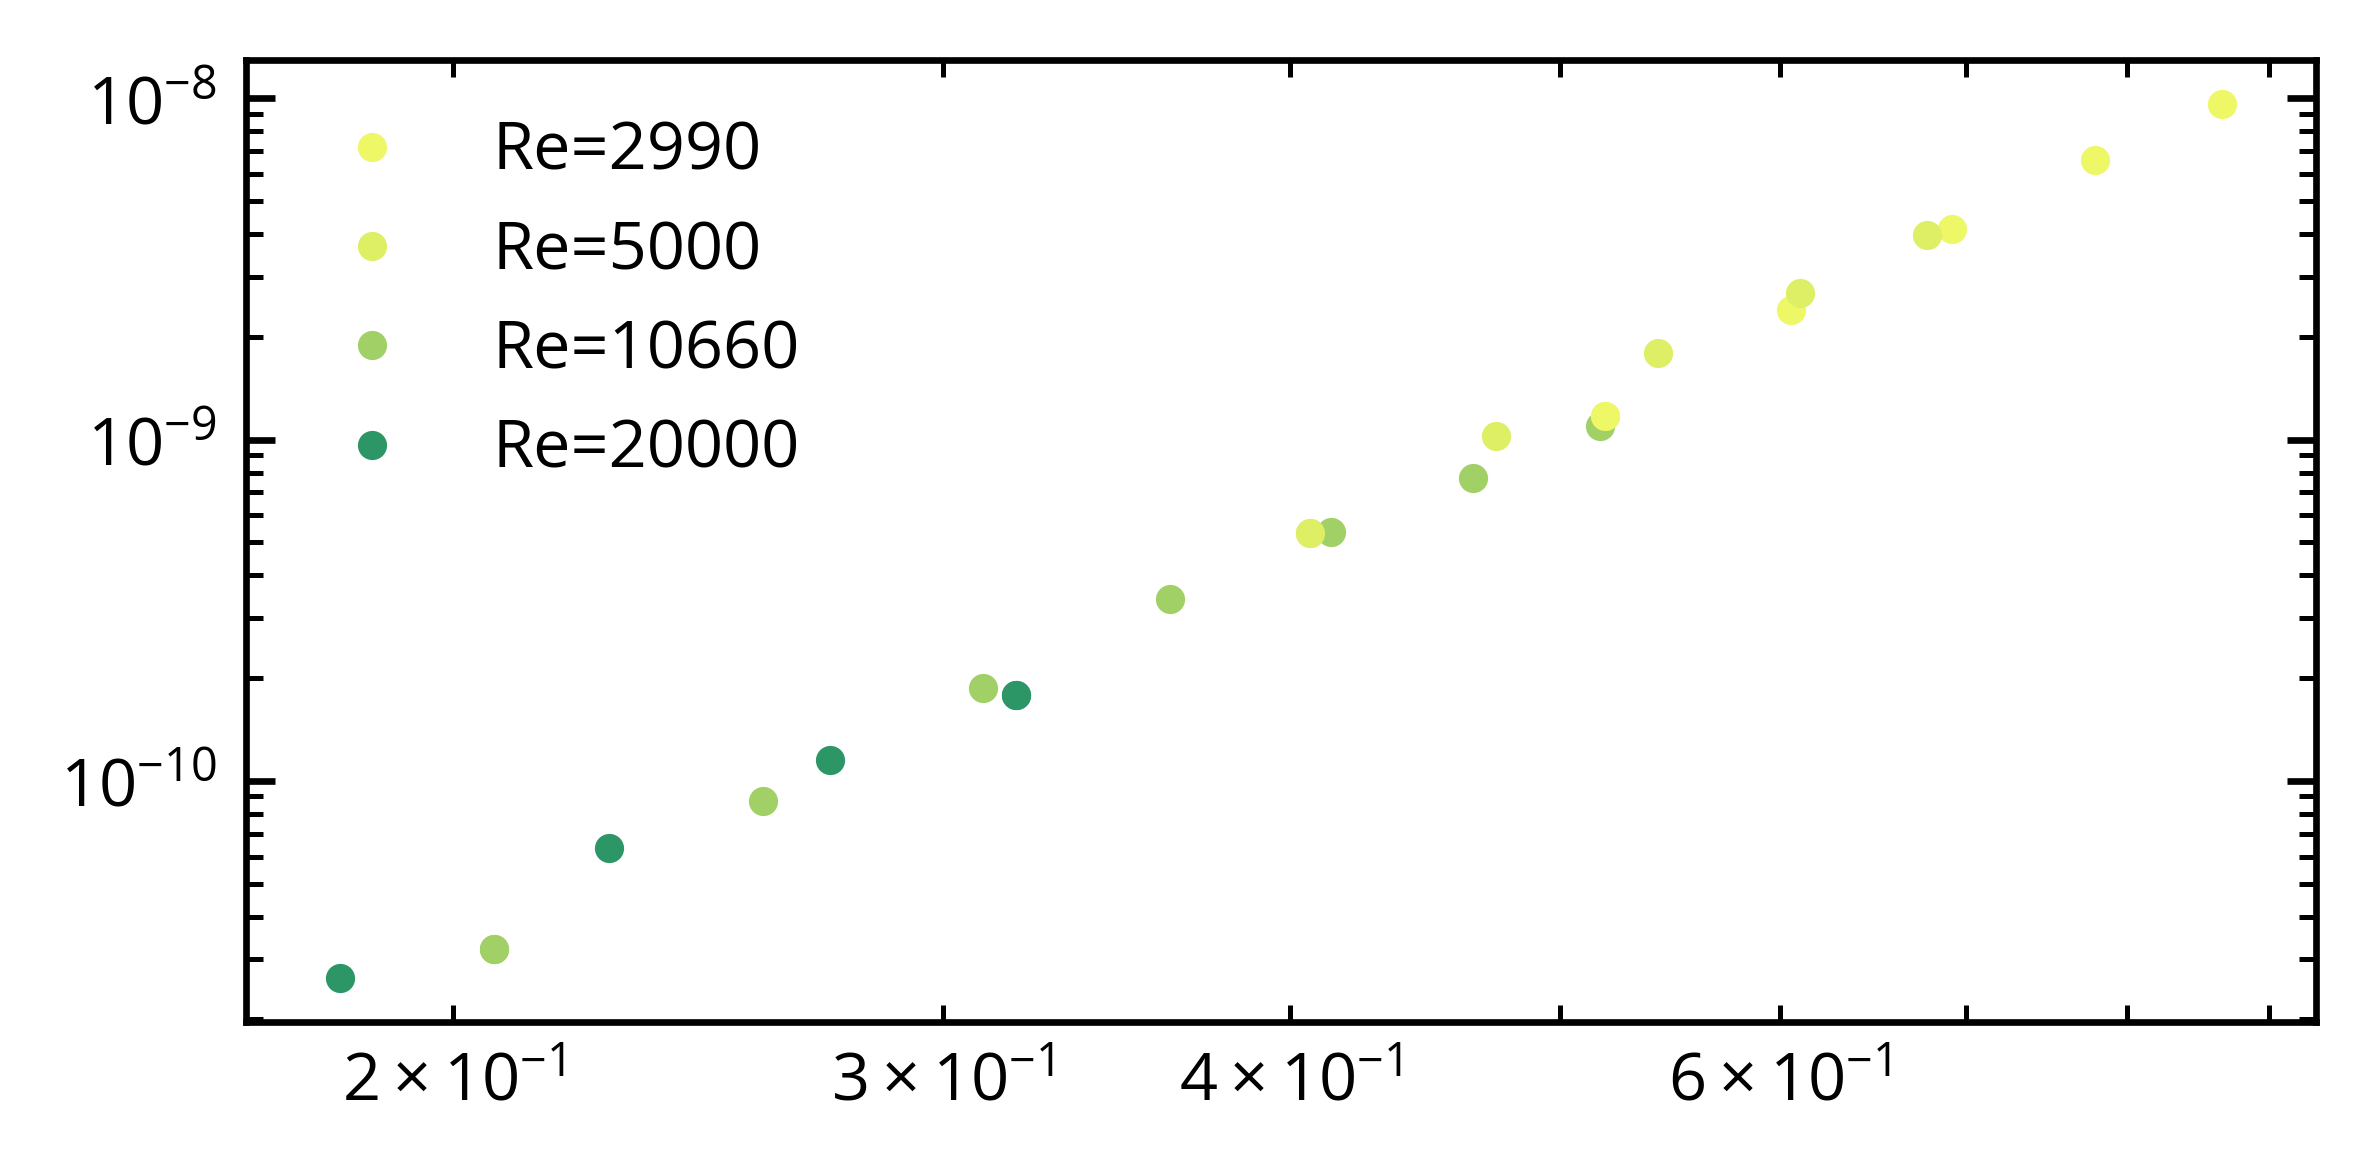

In [591]:
'''Plot the ensemble drift growth rate'''
fig = plt.figure(figsize=[4,2])
for case in case_ensemble:
    plt.plot(case.ustar*case.wave.c,case.da/case.Re,'.',color=plt.cm.get_cmap('summer')(1-case.Bo/4))
for i in (0,5,10,-1):
    case = case_ensemble[i]
    plt.plot(case.ustar*case.wave.c,case.da/case.Re,'.',color=plt.cm.get_cmap('summer')(1-case.Bo/4), label='Re=%g' %case.Re)
# plt.ylabel(r'drift growth rate * $\nu$')
# plt.xlabel(r'$(u_*/c)^2$')
# plt.ylim(-1e-9,1e-8); plt.xlim(0,0.8)
plt.legend()
plt.xscale('log'); plt.yscale('log')

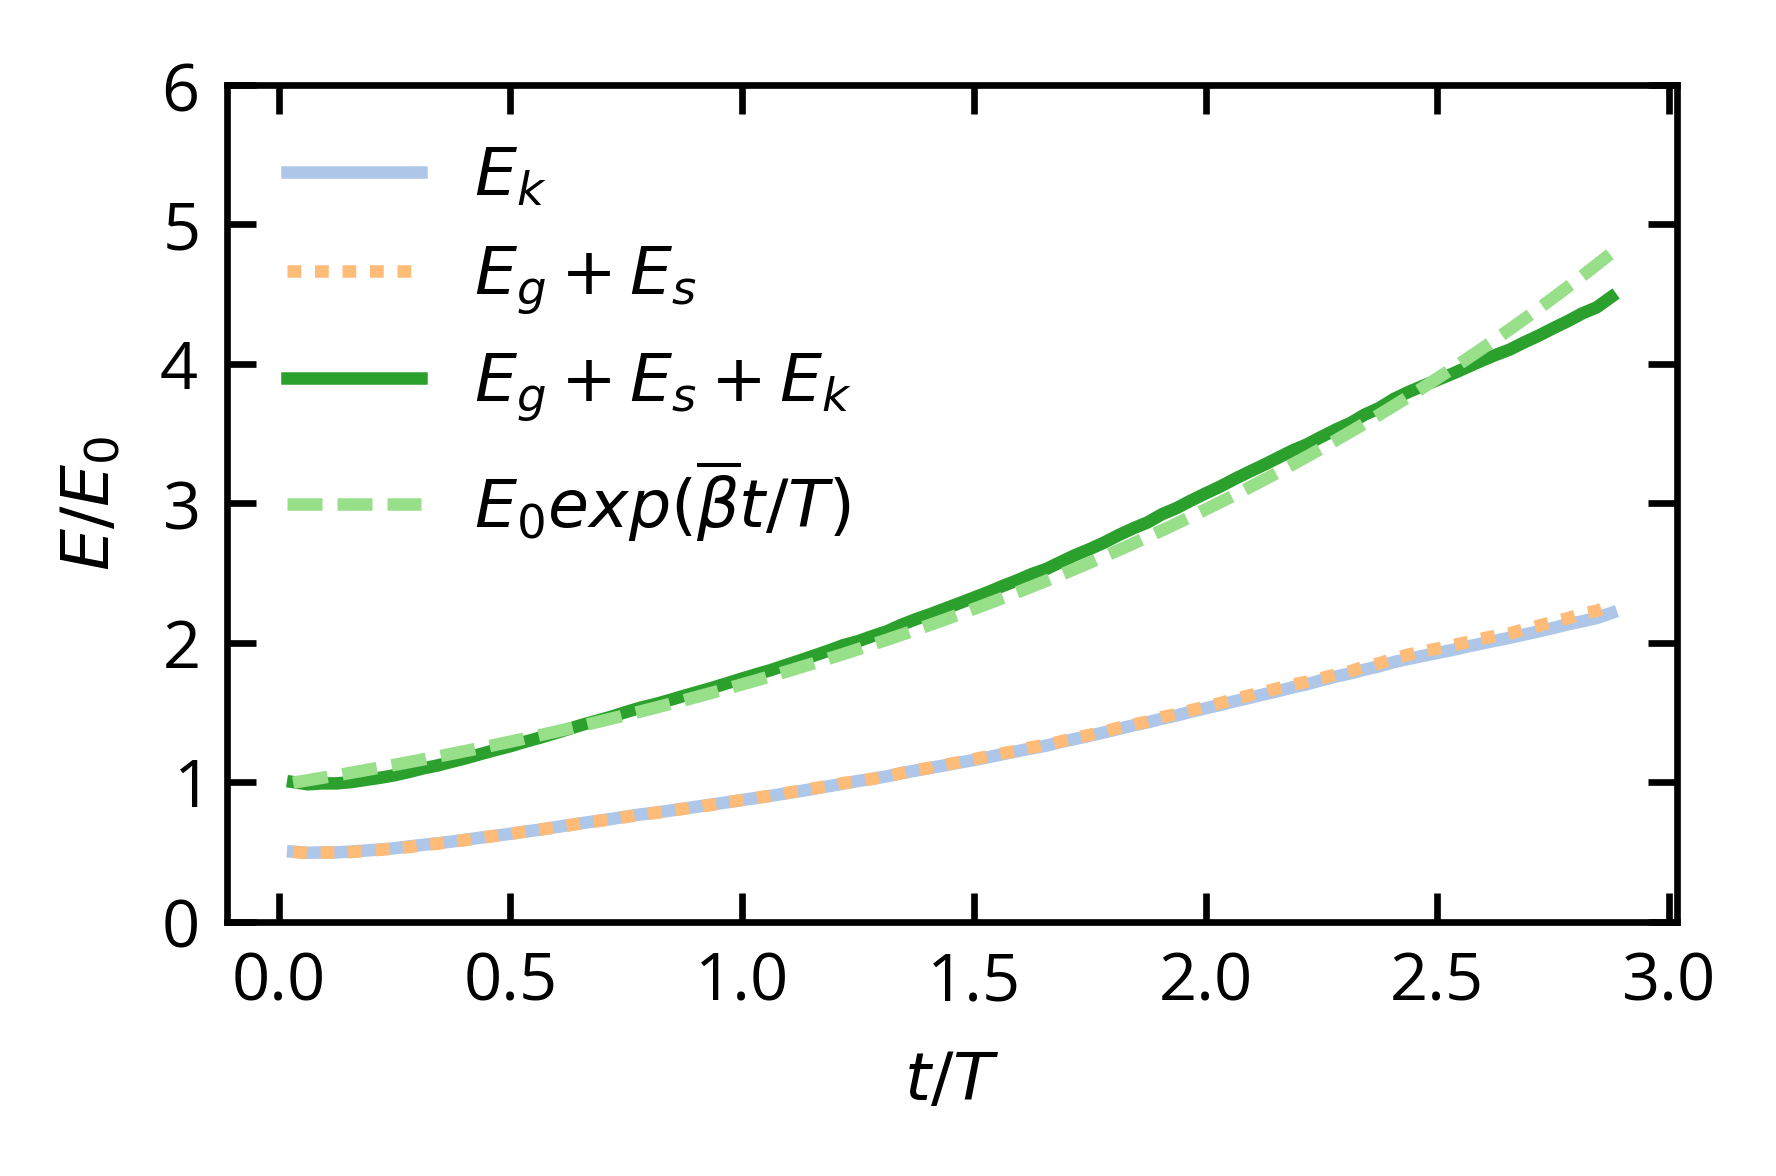

In [13]:
""" Plot one case to show the energy curve. """
fig = plt.figure(figsize=[3,2]); ax =fig.gca()
def plot_energy_filtered(N_time, CAPI=False):
#     plt.plot(case.t,case.pe_g,':',label='wave GPE')
#     plt.plot(case.t,case.pe_s,':',label='wave SE')
    ax.plot(case.t[1:-3],case.ke_wave[1:-3]/case.energy_wave[1], '-', label=r'$E_k$', color=plt.get_cmap('tab20')(1))
    ax.plot(case.t[1:-3],case.pe_wave[1:-3]/case.energy_wave[1], ':', label=r'$E_g+E_s$', color=plt.get_cmap('tab20')(3))
    ax.plot(case.t[1:-3],case.energy_wave[1:-3]/case.energy_wave[1], '-', label=r'$E_g+E_s+E_k$', color=plt.get_cmap('tab20')(4))
    ax.plot(case.t[1:-3],np.exp(case.wa*case.t[1:-3]+case.wb)/case.energy_wave[1], '--', label=r'$E_0 exp(\overline{\beta} t/T)$', color=plt.get_cmap('tab20')(5))
#     ax.plot(case.t[1:-3],np.exp(case.wa*case.t[1:-3]+case.wb),'--',label='exp(%.2f t + %.2f)' %(case.wa,case.wb), color=plt.get_cmap('tab20')(3))
#     ax.plot(case.t[1:-3],case.ke_drift[1:-3],label='drift KE') 
#     ax.plot(case.t[1:-3],case.da*case.t[1:-3]+case.db,'--',label='%.4f t + %.4f' %(case.da,case.db), color=ax.lines[-1].get_color())
    plt.legend(loc='upper left'); 
#     plt.title(r'$u_*/c = %g, Bo = %g$' %(case.ustar,case.Bo))
case = case_ensemble[16] #-2
# eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)
# case.growth_rate(96,CAPI=True)

plot_energy_filtered(96, CAPI=True)
ax.set_ylim([0,6])
ax.set_xlabel(r'$t/T$'); ax.set_ylabel(r'$E/E_0$')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
fig.savefig(working_dir+'plots/energy_wave.eps', bbox_inches='tight', pad_inches=0.1)

Text(0.5, 1.0, 'Re = 5513, Bo = 1.47, $u_*/c$ = 1')

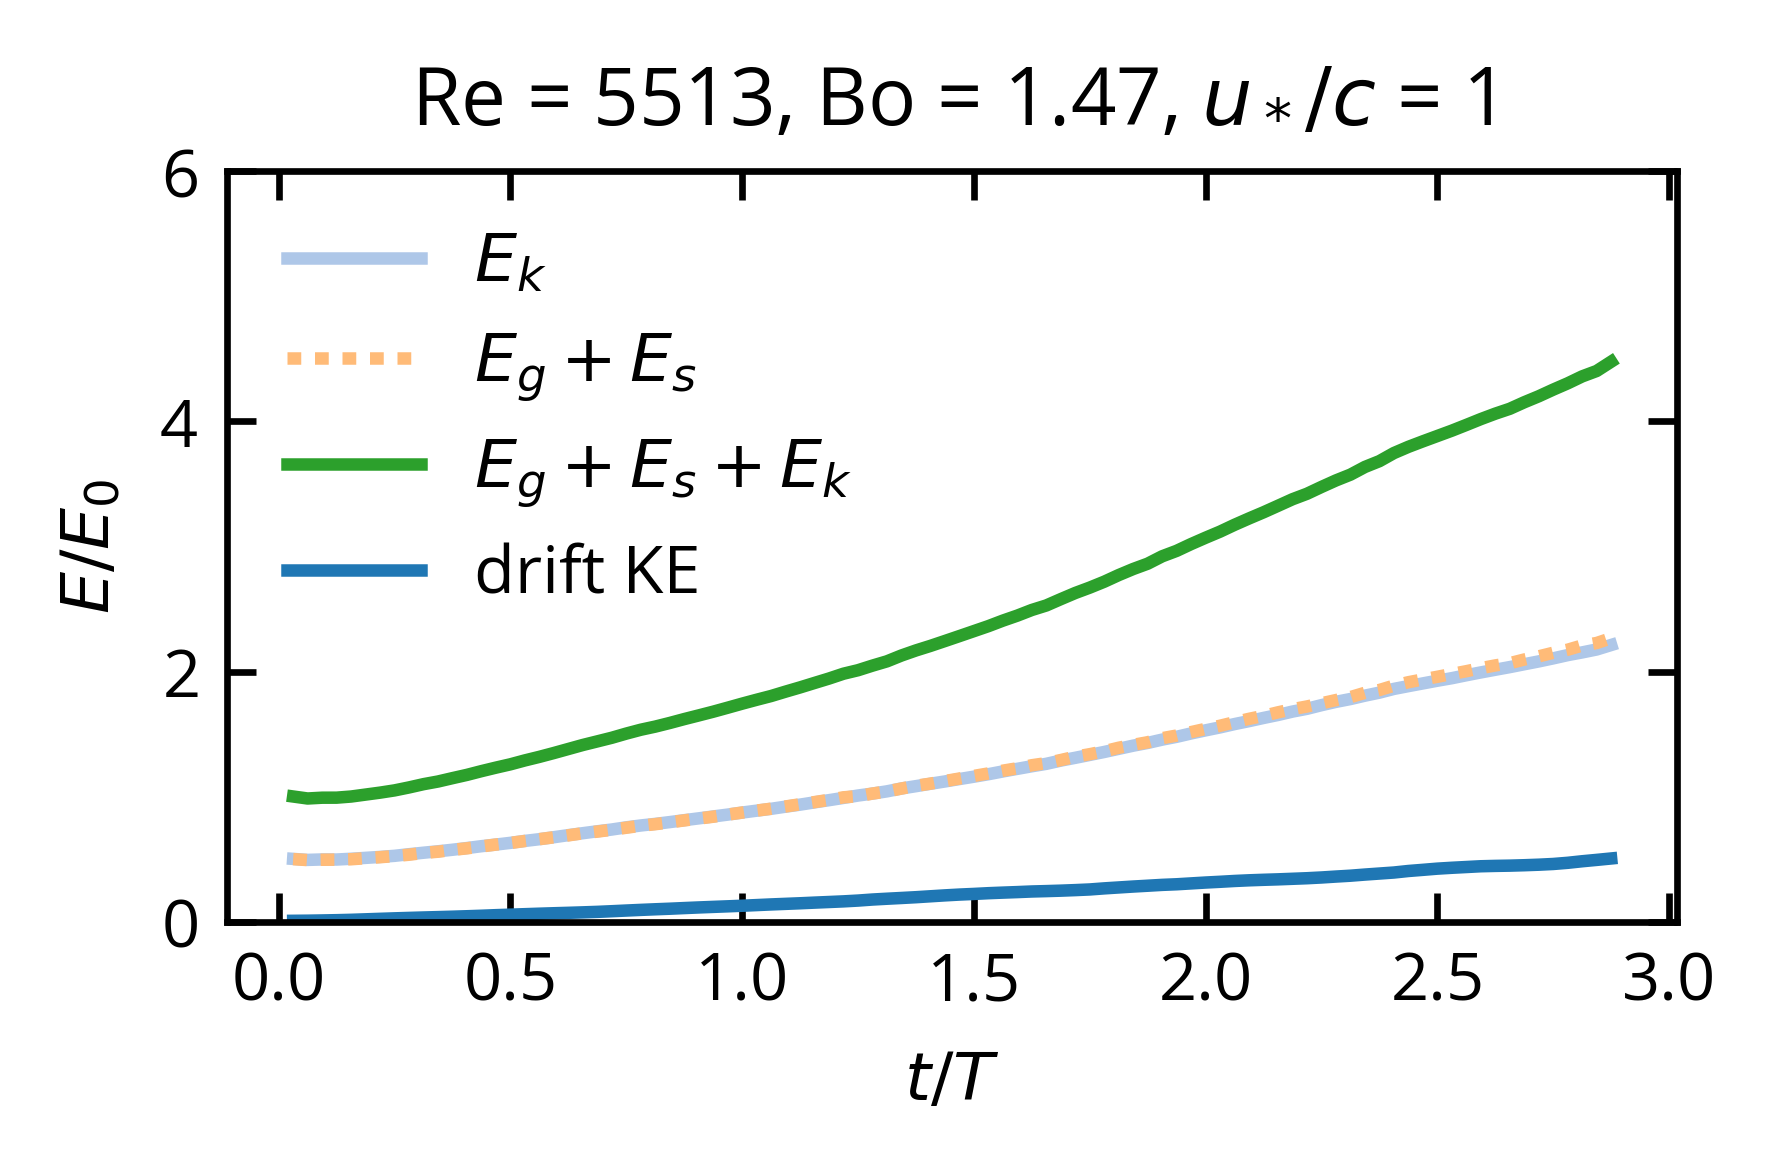

In [27]:
""" For revision. Plot drift kinetic energy too. """
fig = plt.figure(figsize=[3,2]); ax =fig.gca()
def plot_energy_filtered(N_time, CAPI=False):
#     plt.plot(case.t,case.pe_g,':',label='wave GPE')
#     plt.plot(case.t,case.pe_s,':',label='wave SE')
    ax.plot(case.t[1:-3],case.ke_wave[1:-3]/case.energy_wave[1], '-', label=r'$E_k$', color=plt.get_cmap('tab20')(1))
    ax.plot(case.t[1:-3],case.pe_wave[1:-3]/case.energy_wave[1], ':', label=r'$E_g+E_s$', color=plt.get_cmap('tab20')(3))
    ax.plot(case.t[1:-3],case.energy_wave[1:-3]/case.energy_wave[1], '-', label=r'$E_g+E_s+E_k$', color=plt.get_cmap('tab20')(4))
#     ax.plot(case.t[1:-3],np.exp(case.wa*case.t[1:-3]+case.wb)/case.energy_wave[1], '--', label=r'$E_0 exp(\overline{\beta} t/T)$', color=plt.get_cmap('tab20')(5))
#     ax.plot(case.t[1:-3],np.exp(case.wa*case.t[1:-3]+case.wb),'--',label='exp(%.2f t + %.2f)' %(case.wa,case.wb), color=plt.get_cmap('tab20')(3))
    ax.plot(case.t[1:-3],case.ke_drift[1:-3]/case.energy_wave[1],label='drift KE') 
#     ax.plot(case.t[1:-3],case.da*case.t[1:-3]+case.db,'--',label='%.4f t + %.4f' %(case.da,case.db), color=ax.lines[-1].get_color())
    plt.legend(loc='upper left'); 
#     plt.title(r'$u_*/c = %g, Bo = %g$' %(case.ustar,case.Bo))
case = case_ensemble[4] #-2
case = case_ensemble[9]
case = case_ensemble[16]
case.t = case.t[0:96]
# eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)
# case.growth_rate(96,CAPI=True)
plot_energy_filtered(96, CAPI=True)
ax.set_ylim([0,6])
ax.set_xlabel(r'$t/T$'); ax.set_ylabel(r'$E/E_0$')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.title('Re = %.0f, Bo = %g, $u_*/c$ = %g' %(case.Re*case.wave.c, case.Bo, case.ustar))

In [ ]:
'''Plot the forward travelling and backward travelling wave''' 
case = case_ensemble[1]
# case = Case(ustar=0.8, ak=0.05, Bo=0.27, Re=2990, LEVEL=11, L0=1., g=1., k=2.*np.pi,
#      working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test2_')
eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)

plt.style.use('pof')
N_zero = 0
N_time = 16

from matplotlib import gridspec
fig = plt.figure(figsize=(12,4)) 
gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,1]) 
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
ax5 = plt.subplot(gs[0,2])
ax6 = plt.subplot(gs[1,2])
eta_std1 = np.zeros(N_time)
eta_std2 = np.zeros(N_time)
eta_std3 = np.zeros(N_time)
# x = np.arange(0,32)/32
x = np.arange(0,32)/32
t = np.arange(0,N_time)/32
for i in range(0,N_time):
    ax1.plot(x,np.real(eta1[i+N_zero])*2*np.pi,color=plt.cm.get_cmap('summer')(1-i/N_time))
    ax2.plot(x,np.real(eta2[i+N_zero])*2*np.pi,color=plt.cm.get_cmap('summer')(1-i/N_time))
    ax5.plot(x,np.real(eta1[i+N_zero]+eta2[i+N_zero])*2*np.pi,color=plt.cm.get_cmap('summer')(1-i/N_time))
    eta_std1[i] = np.std(eta1[i+N_zero])*2*np.pi*2**0.5
    eta_std2[i] = np.std(eta2[i+N_zero])*2*np.pi*2**0.5
    eta_std3[i] = np.std(case.eta_unfiltered[i])*2*np.pi*2**0.5
ax3.plot(t,eta_std1,label='filtered'); ax3.plot(t,eta_std3,label='original'); ax4.plot(t,eta_std2), ax6.plot(t,eta_std3)
ax1.set_ylim(-0.2,0.2); ax2.set_ylim(-0.2,0.2); ax5.set_ylim(-0.2,0.2);
ax3.set_ylim(0.025,0.12); ax6.set_ylim(0.025,0.12)
ax1.set_ylabel(r"$\eta(x)$"); ax1.set_xlabel("x"); ax2.set_xlabel("x"); ax5.set_xlabel("x");
ax3.set_ylabel(r"$ak(t)$"); ax3.set_xlabel("t"); ax4.set_xlabel("t"); ax6.set_xlabel("t");
ax1.set_title('Forward traveling wave');ax2.set_title('Backward traveling wave');ax5.set_title('Original wave')
ax3.legend(loc='upper left'); fig.tight_layout(); 

Text(-0.45, -0.45, '$u_{drift}$')

/home/jiarong/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/jiarong/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


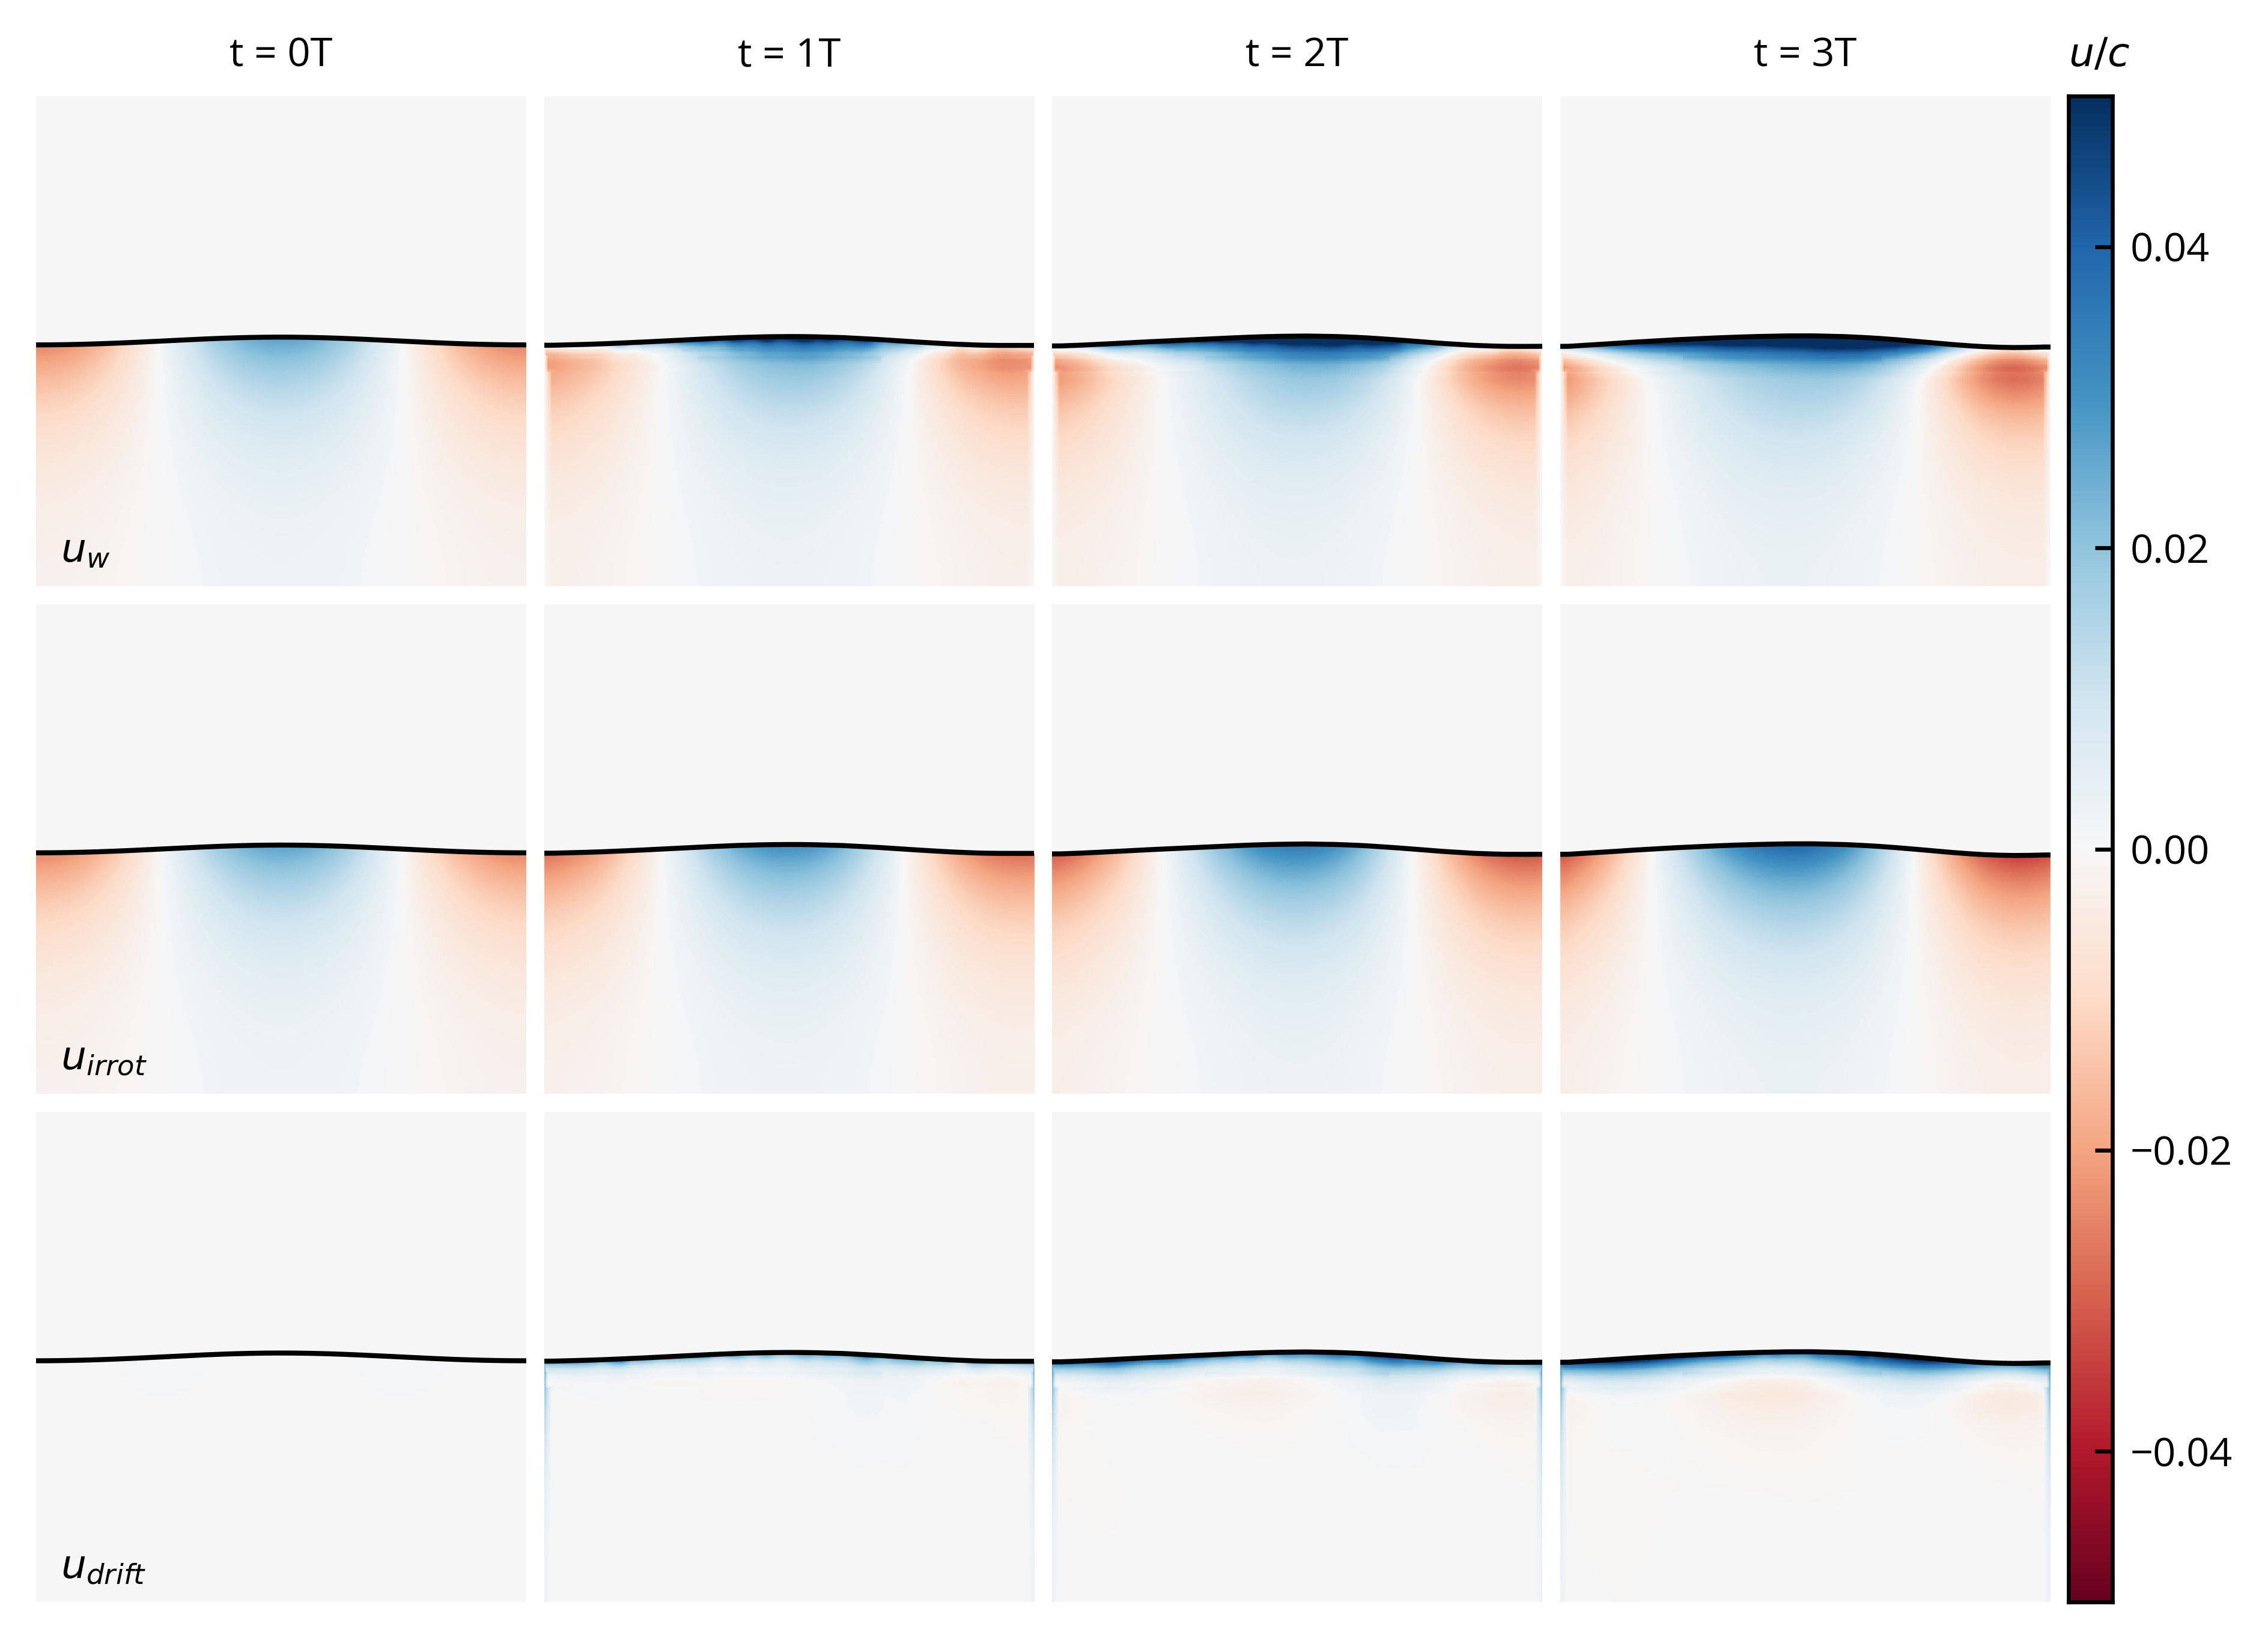

In [41]:
'''Plotting u_partition'''
from mpl_toolkits.axes_grid1 import ImageGrid
def plot_partition(u_group, eta, t, grid, c, L0 = 1, N = 512):
    # c is used to normalize the velocity
    x = np.linspace(-L0/2, L0/2, N, endpoint = False) + L0/N/2
    x_eta = np.linspace(-L0/2, L0/2, np.size(eta), endpoint = False) + L0/np.size(eta)/2
    eta_interp = np.interp(x, x_eta, eta)
    for (ax, u) in zip(grid, ugroup):
        ax.clear()
        pcontour = ax.imshow(np.rot90(u), vmax = 0.05, vmin = -0.05, extent = (-L0/2,L0/2,-L0/2,L0/2), cmap='RdBu')
        ax.set_axis_off()
        ax.plot(x, eta_interp, '-', color='k', linewidth=1)
    # The viscous scaling of shear layer thickness
#     Re = 5000; nu = 1/Re; T = 1.475; c = 0.6778; USTAR_RATIO = 1.2
#     ustar = USTAR_RATIO*c
    # ax.plot(ampl._eta_data.x, ampl._eta_data.eta - (nu*T*t)**0.5, color='r', linewidth=1)
    # ax.plot(ampl._eta_data.x, ampl._eta_data.eta - nu*1/ustar, color='g', linewidth=1)
    grid[0].set_title("t = %gT" %t, fontsize=8)
    return pcontour

fig = plt.figure(figsize=(6,6))
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(3,4),
                 axes_pad=0.05,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="3%",
                 cbar_pad=0.05,
                 )
case = case_ensemble[14]
ugroup = case.call_partition(0, FILTERING=False, CAPI=True)
pcontour = plot_partition(ugroup, case.eta_unfiltered[0], 0, [grid[0],grid[4],grid[8]], case.wave.c)
ugroup = case.call_partition(32, FILTERING=False, CAPI=True)
plot_partition(ugroup, case.eta_unfiltered[32], 1, [grid[1],grid[5],grid[9]], case.wave.c)
ugroup = case.call_partition(64, FILTERING=False, CAPI=True)
plot_partition(ugroup, case.eta_unfiltered[64], 2, [grid[2],grid[6],grid[10]], case.wave.c)
ugroup = case.call_partition(95, FILTERING=False, CAPI=True)
plot_partition(ugroup, case.eta_unfiltered[95], 3, [grid[3],grid[7],grid[11]], case.wave.c)
grid[11].cax.colorbar(pcontour)
grid[11].cax.text(1,0.052, r'$u/c$')

grid[0].text(-0.45,-0.45, r'$u_w$', fontsize=8); grid[4].text(-0.45,-0.45, r'$u_{irrot}$'); grid[8].text(-0.45,-0.45, r'$u_{drift}$')
# fig.savefig(working_dir+'plots/evolution.png', pad_inches=0.1)

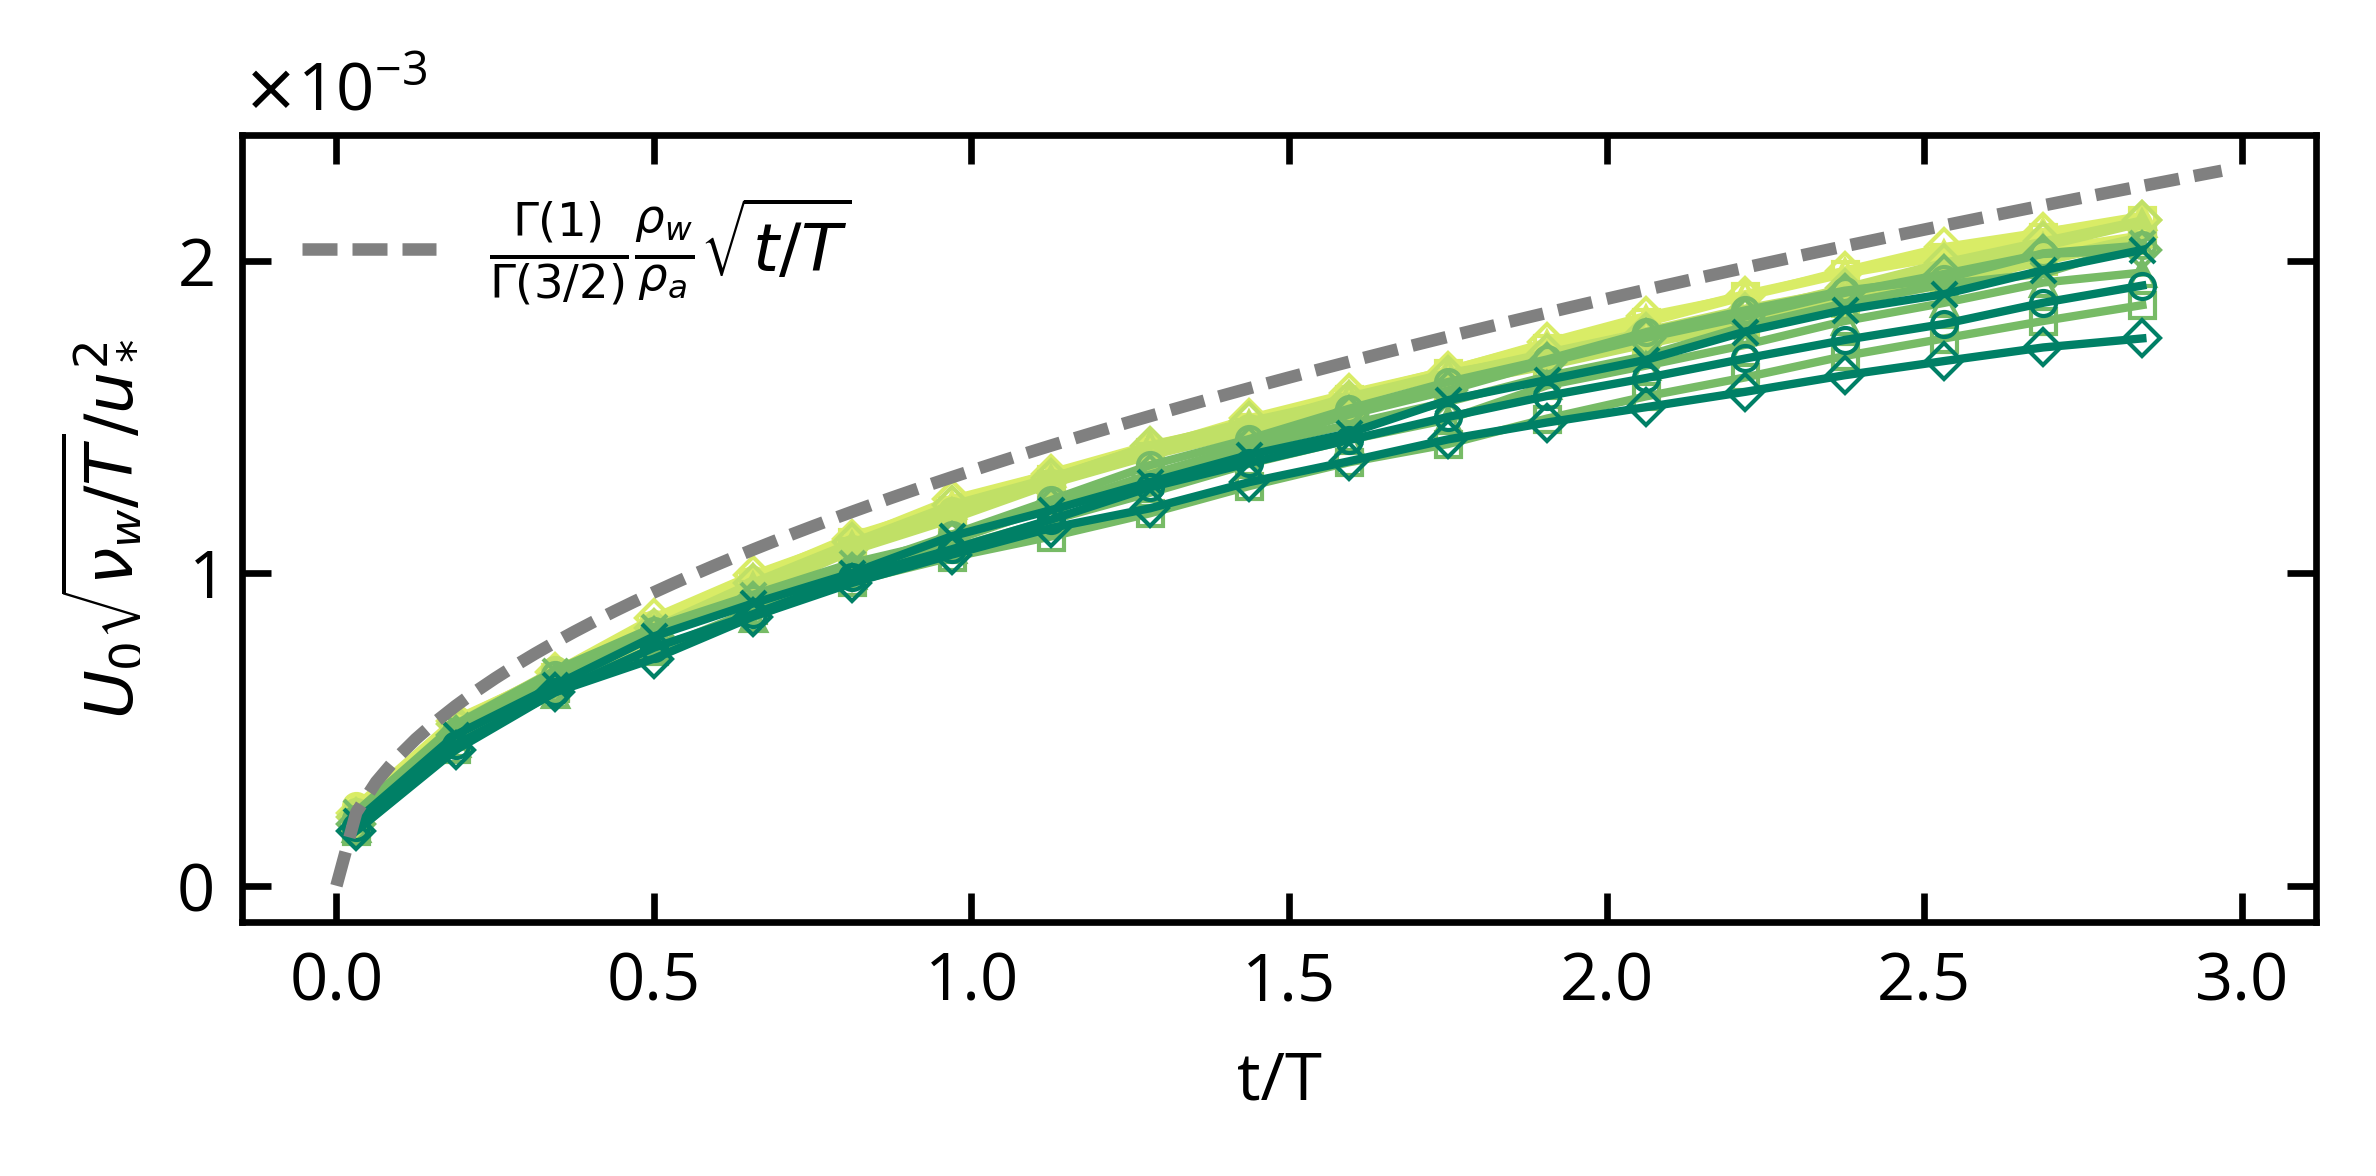

In [58]:
t = np.arange(0,96)/32
fig = plt.figure(figsize=[4,2])
mpl.rc('hatch', color='k', linewidth=0.5)
from scipy.special import gamma
for case in case_ensemble:
    eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 96, N_padding = 9, WINDOW = True)
    case.availt = 96 # Manually set the time range
    case.drift_evolution()
#     case.growth_rate(96,CAPI=True)
    if (case.ustar == 0.5):
        plt.plot(t[1:-1:5],case.drift_max[1:-1:5]*(1/case.Re)**0.5/(case.ustar*case.wave.c)**2/(2*np.pi/case.wave.omega)**0.5, '-',
                 color=plt.cm.get_cmap('summer')(1-case.Re/20000), marker = 'x', mfc='none', markeredgewidth=0.5, markersize=3, lw=1)
    if (case.ustar == 0.6):
        plt.plot(t[1:-1:5],case.drift_max[1:-1:5]*(1/case.Re)**0.5/(case.ustar*case.wave.c)**2/(2*np.pi/case.wave.omega)**0.5, '-',
                 color=plt.cm.get_cmap('summer')(1-case.Re/20000), marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, lw=1)
    if (case.ustar == 0.7):
        plt.plot(t[1:-1:5],case.drift_max[1:-1:5]*(1/case.Re)**0.5/(case.ustar*case.wave.c)**2/(2*np.pi/case.wave.omega)**0.5, '-',
                 color=plt.cm.get_cmap('summer')(1-case.Re/20000), marker = 'D', mfc='none', markeredgewidth=0.5, markersize=3, lw=1)
    if (case.ustar == 0.8):
        plt.plot(t[1:-1:5],case.drift_max[1:-1:5]*(1/case.Re)**0.5/(case.ustar*case.wave.c)**2/(2*np.pi/case.wave.omega)**0.5, '-',
                 color=plt.cm.get_cmap('summer')(1-case.Re/20000), marker = '^', mfc='none', markeredgewidth=0.5, markersize=3, lw=1)
    if (case.ustar == 0.9):
        plt.plot(t[1:-1:5],case.drift_max[1:-1:5]*(1/case.Re)**0.5/(case.ustar*case.wave.c)**2/(2*np.pi/case.wave.omega)**0.5, '-',
                 color=plt.cm.get_cmap('summer')(1-case.Re/20000), marker = 's', mfc='none', markeredgewidth=0.5, markersize=3, lw=1)
        
case = case_ensemble[0]
plt.plot(t, t**0.5*gamma(1)/gamma(3/2)/850, '--', label=r'$\frac{\Gamma(1)}{\Gamma(3/2)}\frac{\rho_w}{\rho_a}\sqrt{t/T}$', color='gray')
plt.xlabel('t/T'); plt.ylabel(r'$U_0 \sqrt{\nu_w / T}/u_*^2$')
ax = plt.gca()
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.legend()
fig.savefig(working_dir+'plots/drift_max.pdf', bbox_inches='tight', pad_inches=0.1)

In [ ]:
''' Animation '''
from matplotlib import animation
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

plt.rcParams['figure.dpi'] = 100

# Single animation generation function
def plot_animation(frame_number = 10, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate   
    global case
    fig = plt.figure(figsize=(10,4))
    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(1,3),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.15,
                     )
    ugroup = case.call_partition(0, FILTERING=True, CAPI=True)
    pcontour = plot_partition(ugroup, case.eta_unfiltered[0], 0, grid)
    grid[2].cax.colorbar(pcontour)

    # animation function.  This is called sequentially
    def animate(i):
        eta = case.eta_unfiltered[i]
        ugroup = case.call_partition(i, FILTERING=True, CAPI=True)        
        x = np.linspace(-L0/2, L0/2, N, endpoint = False) + L0/N/2
        x_eta = np.linspace(-L0/2, L0/2, np.size(eta), endpoint = False) + L0/np.size(eta)/2
        eta_interp = np.interp(x, x_eta, eta)
        for (ax, u) in zip(grid, ugroup):
            ax.clear()
            pcontour = ax.imshow(np.rot90(u), vmax = 0.05, vmin = -0.05, extent = (-L0/2,L0/2,-L0/2,L0/2), cmap='RdBu')
            ax.set_axis_off()
            ax.plot(x, eta_interp, color='k', linewidth=1)
        ax.cax.colorbar(pcontour)
        grid[0].set_title("t = %gT" %t)
    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = False)  
    return anim

case = case_ensemble[4]
anim = plot_animation(frame_number = 40, interval_time = 400) # Specify frame number
HTML(anim.to_html5_video())

In [ ]:
# Plot the 1D shear and normalization
from scipy.special import pbdv, gamma
from matplotlib import gridspec
L0 = 1
fig = plt.figure(figsize=(4,3)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
N_time = 6
case = case_ensemble[16]
for i in range (1,N_time):
    t = case.t[i*16]
    u_water, u_water_interp, u_water_1D, ygrid = water_profile(t,case.path,case.L0)
    ax1.plot(u_water_1D[0:255]/case.wave.c, ygrid[0:255]/L0, '-', label = 't = %g' %t, color=plt.cm.get_cmap('binary')(i/N_time))
    U0_analy = (t*2*np.pi/case.wave.omega*case.Re)**0.5*(case.ustar*case.wave.c)**2*gamma(1)/gamma(3/2)/850
    U0 = np.max(u_water_1D[0:255])
    # IMPORTANT: changed case.t[i] to t (it was using a different case.t[i] instead of case.t[16*i])
    ax2.plot(u_water_1D[0:255]/U0, ygrid[0:255]/L0/(8*(1/case.Re)*t*2*np.pi/case.wave.omega)**0.5, '-', color=plt.cm.get_cmap('binary')(i/N_time))
u_stokes = np.exp(ygrid[0:255]*2*case.wave.k)*0.1**2*case.wave.c
# ax1.plot(u_stokes, ygrid[0:255], '--')
# y_ = ygrid[0:255]/L0/(8*(1/case.Re)*case.t[i]*2*np.pi/case.wave.omega)**0.5
y_ = np.arange(-10,0.05,0.05)
u_ = gamma(3/2)*2/np.pi**0.5*np.exp(-y_**2)*pbdv(-2,-y_)[0]
u_stokes = np.exp((y_*(8*(1/case.Re)*case.t[i*16]*2*np.pi/case.wave.omega)**0.5)*2*case.wave.k)
# u_ = gamma(3/2)*2/np.pi**0.5*np.exp(-y_**2)
ax2.plot(u_, y_, '--', color='k')
# ax2.plot(u_stokes, y_, '--')
ax1.set_ylabel(r'$y/\lambda$'); ax1.set_ylim([-0.11,0.01])
ax2.set_ylabel(r'$y/\sqrt{8\nu_w t}$')
ax1.set_xlabel(r'$u_{d}/c$'); ax2.set_ylim([-10,1])
ax2.set_xlabel(r'$u_{d}/U_0(t)$'); ax2.set_xlim([-0.2,1.2])
ax1.legend()
ax1.text(0.05, 0.9, '(a)', transform=plt.gcf().transFigure)
ax2.text(0.55, 0.9, '(b)', transform=plt.gcf().transFigure)
fig.tight_layout()
fig.savefig(working_dir + 'plots/drift_1D_ab.eps', bbox_inches='tight', pad_inches=0.1)

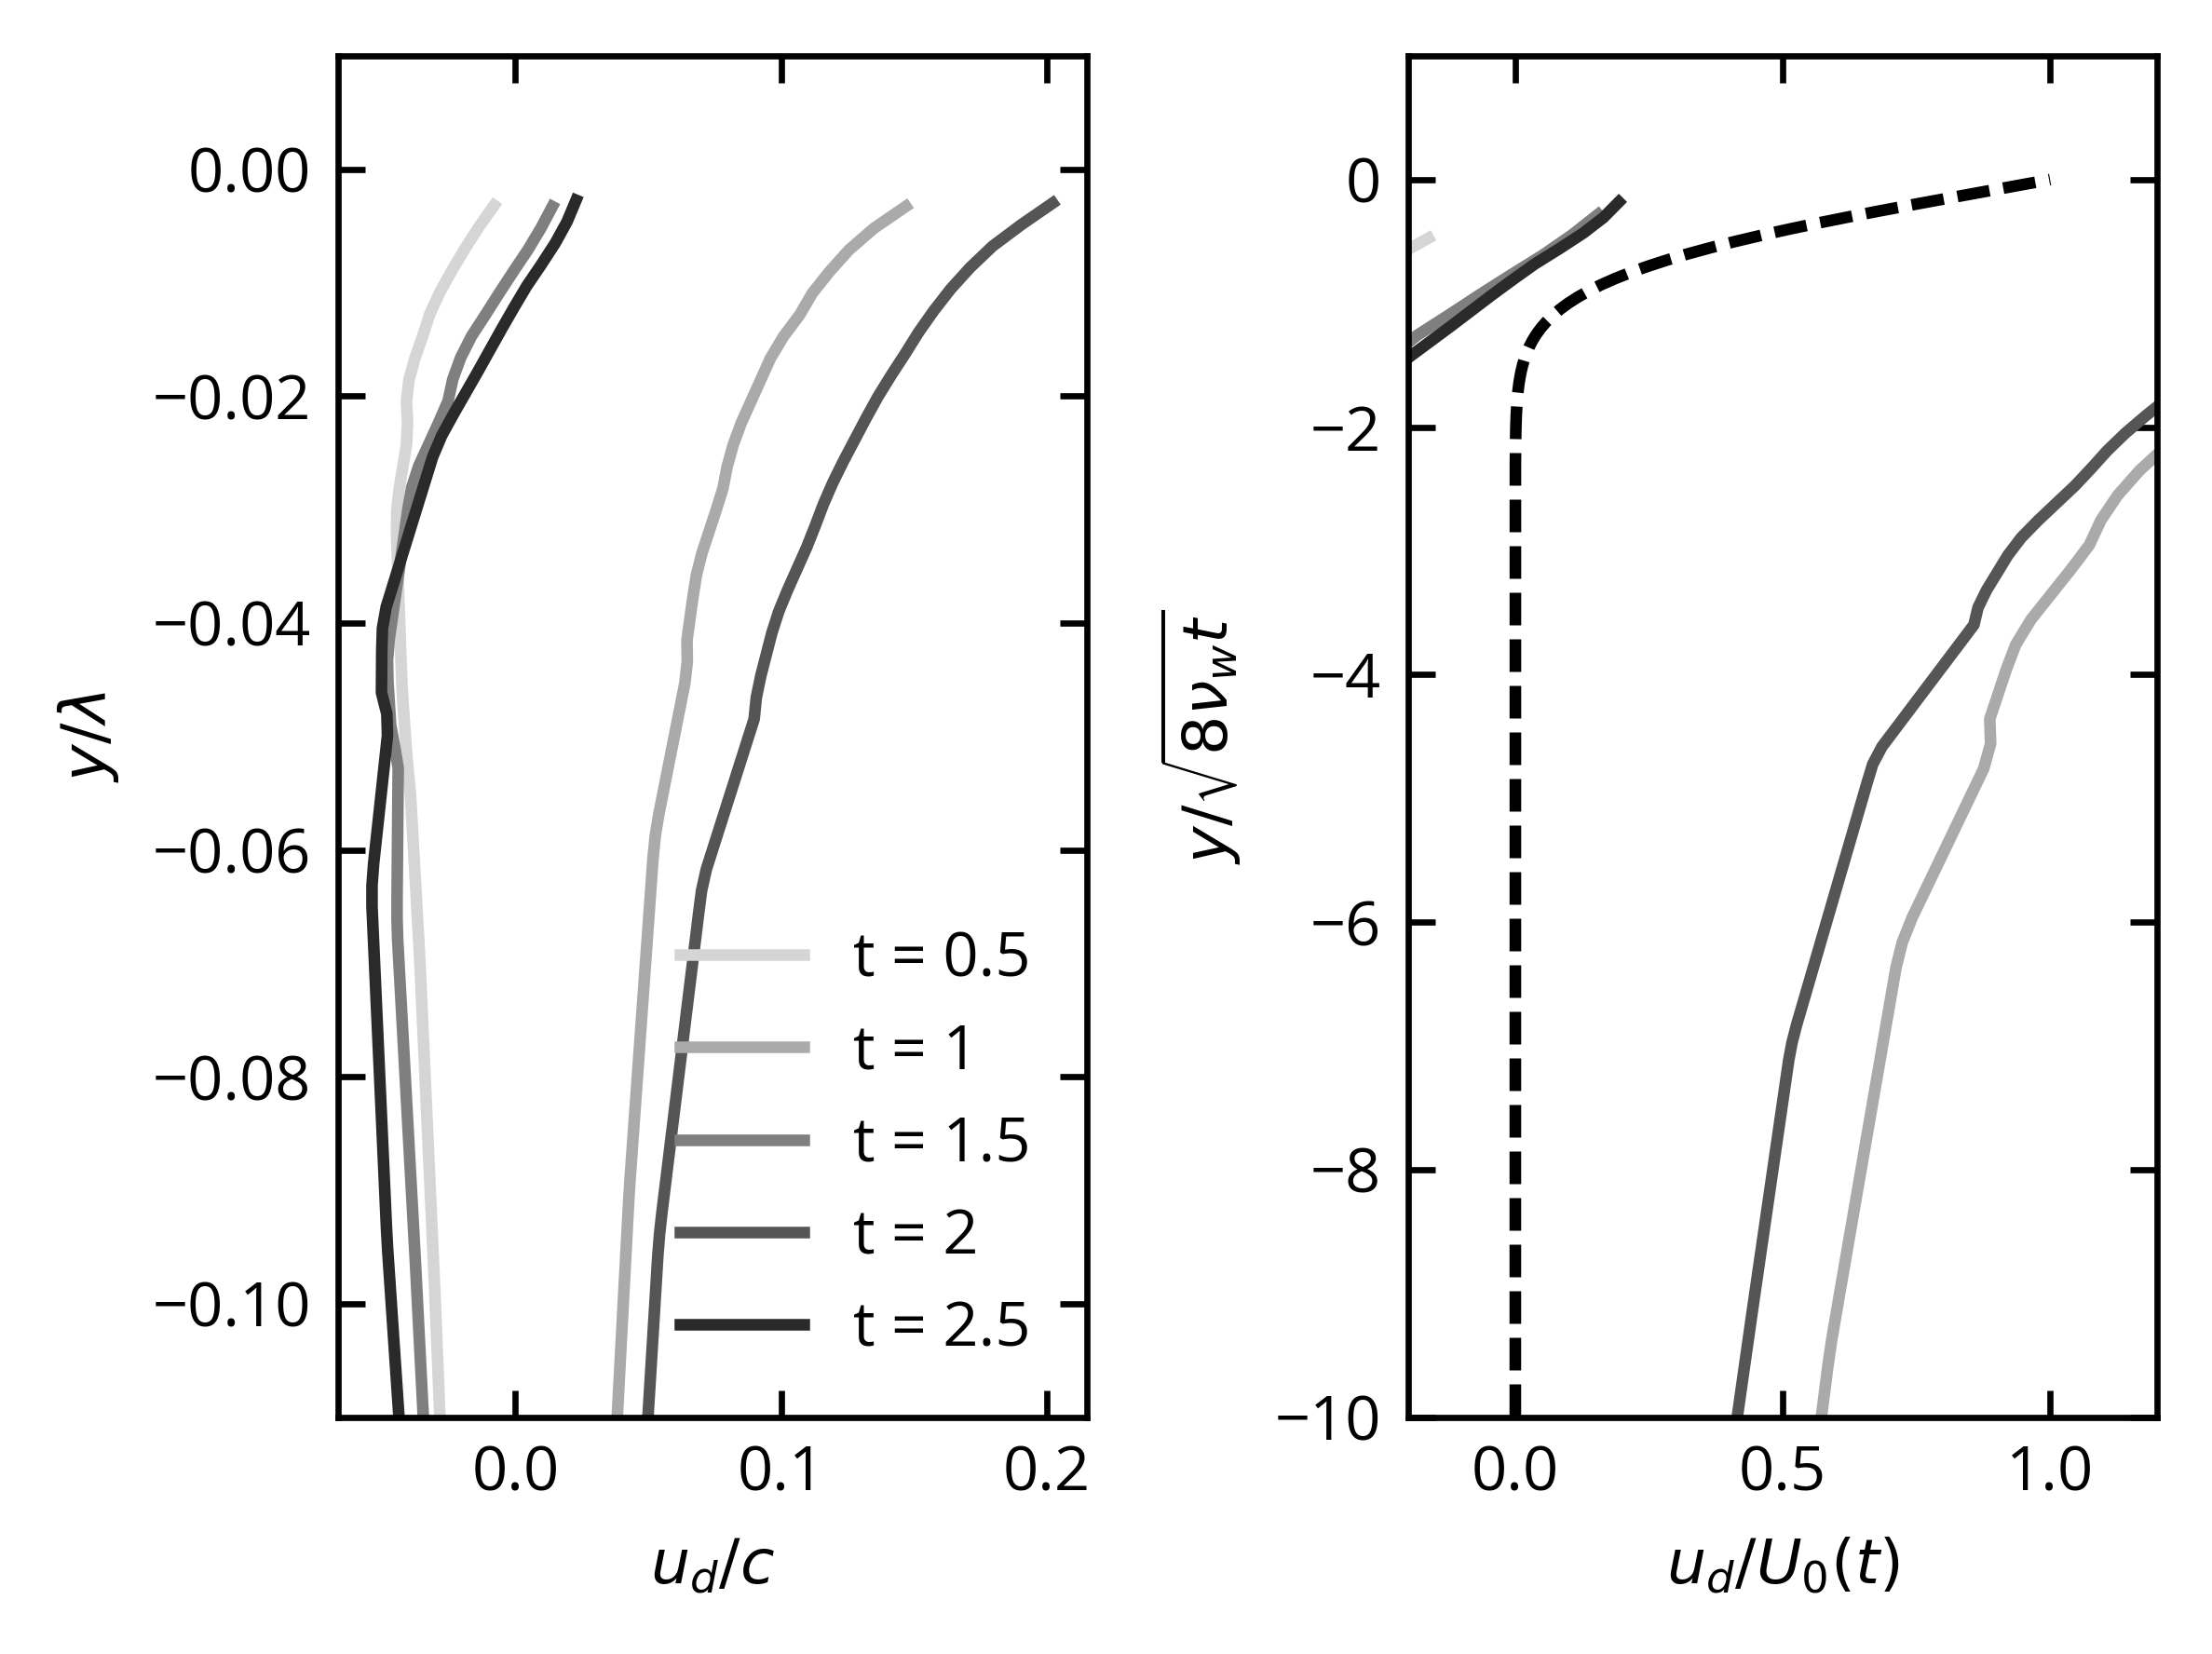

In [315]:
# Plot the 1D shear and normalization
from scipy.special import pbdv, gamma
from matplotlib import gridspec
L0 = 1
fig = plt.figure(figsize=(4,3)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
N_time = 6
case = case_ensemble[16]
for i in range (1,N_time):
    t = case.t[i*16]
    u_water, u_water_interp, u_water_1D, ygrid = water_profile(t,case.path,case.L0)
    ax1.plot(u_water_interp[256,0:255]/case.wave.c, ygrid[0:255]/L0, '-', label = 't = %g' %t, color=plt.cm.get_cmap('binary')(i/N_time))
    U0_analy = (t*2*np.pi/case.wave.omega*case.Re)**0.5*(case.ustar*case.wave.c)**2*gamma(1)/gamma(3/2)/850
    U0 = np.max(u_water_1D[0:255])
    ax2.plot(u_water_interp[256,0:255]/U0, ygrid[0:255]/L0/(8*(1/case.Re)*case.t[i]*2*np.pi/case.wave.omega)**0.5, '-', color=plt.cm.get_cmap('binary')(i/N_time))
u_stokes = np.exp(ygrid[0:255]*2*case.wave.k)*0.1**2*case.wave.c
# ax1.plot(u_stokes, ygrid[0:255], '--')
# y_ = ygrid[0:255]/L0/(8*(1/case.Re)*case.t[i]*2*np.pi/case.wave.omega)**0.5
y_ = np.arange(-10,0.05,0.05)
u_ = gamma(3/2)*2/np.pi**0.5*np.exp(-y_**2)*pbdv(-2,-y_)[0]
u_stokes = np.exp((y_*(8*(1/case.Re)*case.t[i]*2*np.pi/case.wave.omega)**0.5)*2*case.wave.k)
# u_ = gamma(3/2)*2/np.pi**0.5*np.exp(-y_**2)
ax2.plot(u_, y_, '--', color='k')
# ax2.plot(u_stokes, y_, '--')
ax1.set_ylabel(r'$y/\lambda$'); ax1.set_ylim([-0.11,0.01])
ax2.set_ylabel(r'$y/\sqrt{8\nu_w t}$')
ax1.set_xlabel(r'$u_{d}/c$'); ax2.set_ylim([-10,1])
ax2.set_xlabel(r'$u_{d}/U_0(t)$'); ax2.set_xlim([-0.2,1.2])
ax1.legend(); 
fig.tight_layout()
fig.savefig(working_dir + 'plots/drift_1D_atx0.eps', bbox_inches='tight', pad_inches=0.1)

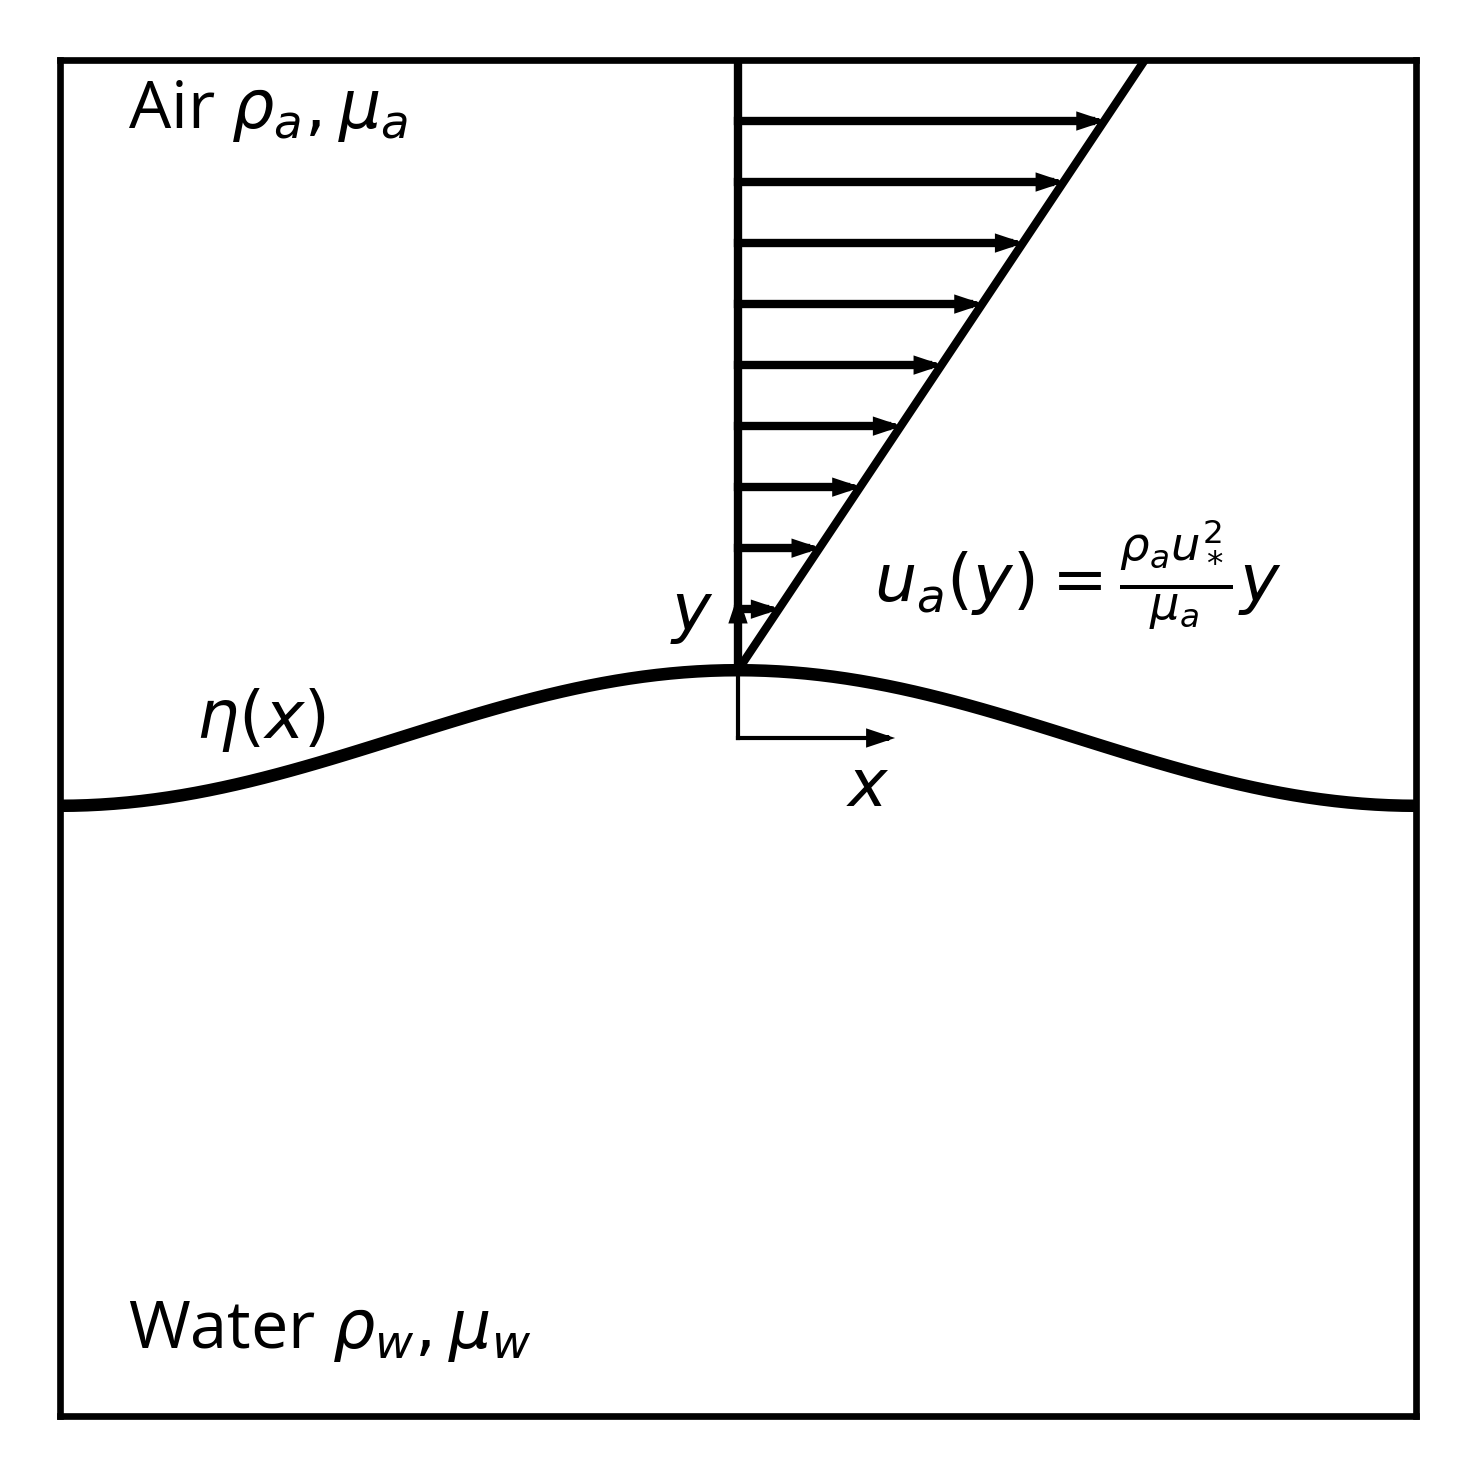

In [4]:
# Sketch of the simulation setup
fig = plt.figure(figsize=[2.5,2.5]); ax = fig.gca()

x = np.arange(0,1.01,0.01)
eta = 0.05*np.cos(2*np.pi*x+np.pi)
plt.plot(x,eta, color='k'); 
ax.set_xlim(0,1); ax.set_ylim(-0.5,0.5)
ax.set_xticks([]); ax.set_yticks([])
u = np.ones(100)*0.5
y = np.linspace(0.05,0.5,100)
ax.plot(u,y,color='k',lw=1)
u = np.linspace(0.5,0.8,100)
y = 0.45/0.3*(u-0.5)+0.05
ax.plot(u,y,color='k',lw=1)
for i in range (1,10):
    y = np.ones(100)*(0.5-0.05)/10*i+0.05
    umax = (y[0]-0.05)*0.3/0.45+0.5
    u = np.linspace(0.5,umax-0.01,100)
    ax.plot(u,y,color='k',lw=1)
    ax.arrow(umax-0.005, y[0], 0.001, 0, shape='full', lw=0.5, color='k', length_includes_head=True, head_width=.01)

# Add coordinate
y = np.ones(100)*0.
u = np.linspace(0.5,0.6,100)
ax.plot(u,y,color='k',lw=0.5)
ax.arrow(0.61, 0, 0.001, 0, shape='full', lw=0.5, color='k', length_includes_head=True, head_width=.01)
ax.text(0.58,-0.05, r'$x$')
y = np.linspace(0,0.1,100)
u = np.ones(100)*0.5
ax.plot(u,y,color='k',lw=0.5)
ax.arrow(0.5, 0.1, 0, 0.001, shape='full', lw=0.5, color='k', length_includes_head=True, head_width=.01)
ax.text(0.45,0.08, r'$y$')
# Add texts
ax.text(0.6,0.1, r'$u_a(y) = \frac{\rho_a u_*^2}{\mu_a}y$')
ax.text(0.1,0, r'$\eta(x)$')
# ax.text(0.1,0.05, r'$\sigma$', fontsize=12)
ax.text(0.05,-0.45, r'Water $\rho_w, \mu_w$')
ax.text(0.05,0.45, r'Air $\rho_a, \mu_a$')
fig.savefig(working_dir+'plots/sketch_withcoord.pdf', bbox_inches='tight', pad_inches=0.1)
# ax.annotate(, xy=(0.5,0), xytext=(0.5,0.5),
#             arrowprops=dict(arrowstyle='-'))

In [ ]:
# Test for a pure capillary case
def capi_energy(eta, sigma, g=1, L0=1):
    pe_g = np.sum(eta**2)/2*g*L0/eta.size
    grad = np.gradient(eta)/(L0/eta.size)
    pe_s = (np.sum((1+grad**2)**0.5)*L0/eta.size-L0)*sigma
    eta_0 = 0.05/2/np.pi*np.cos(np.linspace(0,1,32)*2*np.pi)
    grad_0 = np.gradient(eta_0)/(L0/eta.size)
    pe_s0 = (np.sum((1+grad_0**2)**0.5)*L0/eta_0.size-L0)*sigma
    return (pe_g, pe_s)

def plot_energy_filtered(N_time, CAPI=False):
    fig = plt.figure(figsize=[3,2])
    pe_g = np.zeros(N_time); pe_s = np.zeros(N_time)
    pe_wave = np.zeros(N_time)
    ke_wave = np.zeros(N_time)
    ke_drift = np.zeros(N_time)
    N = 512 # Should match N in call_partition
    t = np.zeros(N_time)
    for i in range (0,N_time):
        t[i] = i/32
        if CAPI:
            pe_g[i], pe_s[i] = capi_energy(case.eta_unfiltered[i,:], case.g/(case.Bo*case.k**2), g=1, L0=1)
            pe_wave[i] = pe_g[i] + pe_s[i]
            u_group = case.call_partition(i, FILTERING=False, CAPI=True)            
        else:
            pe_g[i] = np.std(case.eta_filtered[i,:])**2/2*case.g*case.L0
            pe_wave[i] = pe_g[i]; pe_s[i] = 0
            u_group = case.call_partition(i, FILTERING=False, CAPI=False)            
        ke_wave[i] = np.sum(u_group[1]**2 + u_group[3]**2)/N**2/2 # Take both ux and uy into wave KE
        ke_drift[i] = np.sum(u_group[2]**2)/N**2/2
    
    plt.plot(t,pe_g,':',label='wave GPE')
    plt.plot(t,pe_s,':',label='wave SE')
    plt.plot(t,pe_wave,':',label='wave GPE+SE')
    plt.plot(t,ke_wave,'--',label='wave KE')
    plt.plot(t,ke_drift,label='drift KE')
    plt.legend(loc='upper left'); plt.title(r'$u_*/c = %g, Bo = %g$' %(case.ustar,case.Bo))

case = Case(ustar=0, ak=0.05, Bo=0.001, Re=5000, LEVEL=11, L0=1., g=1., k=2.*np.pi,
     working_dir = '/home/jiarong/research/projects/windwave/rerun/', prefix = 'linear_wavewind_rerun_test_')
eta1,eta2,spectrum1,spectrum2 = case.spectrum_filtering(N_time = 20, N_padding = 0, WINDOW = False)
plot_energy_filtered(20, CAPI=True)
ax = plt.gca()
plt.xlabel('t/T')

In [ ]:
# First perform time FFT (following Dauxois)
# path = working_dir + 'rerun/linear_wavewind_nowind_dirac_Ustar0ak0.05Bo3.31Re20000.LEVEL11/'
# path = working_dir + 'rerun/linear_wavewind_rerun_Ustar1ak0.05Bo1.47Re10660.LEVEL11/'
# N_time = 96
# N_point = 32
# eta_series = []
# t = np.zeros(N_time)
# for i in range (0,N_time):
#     t[i] = i/32.
#     ampl = interface(path, Npoint=N_point, L0=1, time=t[i])
#     eta_series.append(ampl.eta_interp-np.average(ampl.eta_interp))
# eta_series = np.array(eta_series)
# eta_complex = np.zeros(eta_series.shape)
# eta_complex = eta_complex.astype(complex)
# for i in range(0,N_point):
#     f_omega = np.fft.fft(eta_series[:,i]-np.average(eta_series[:,i]))
#     f_omega_positive = np.zeros(f_omega.shape)
#     f_omega_positive = f_omega_positive.astype(complex)
#     f_omega_positive[0:np.int(N_time/2)] = np.copy(f_omega[0:np.int(N_time/2)])*2
#     eta_complex[:,i] = np.fft.ifft(f_omega_positive)
# eta1 = np.zeros(eta_series.shape)
# eta2 = np.zeros(eta_series.shape)
# eta_real = np.zeros(eta_series.shape)
# for i in range(0,N_time):
#     f_kx = np.fft.fft(eta_complex[i,:])
#     f_kx_positive = np.zeros(f_kx.shape)
#     f_kx_positive = f_kx_positive.astype(complex)
#     f_kx_positive[0:np.int(N_point/2)] = np.copy(f_kx[0:np.int(N_point/2)])
#     f_kx_negative = f_kx-f_kx_positive
#     eta1[i,:] = np.real(np.fft.ifft(f_kx_negative))
#     eta2[i,:] = np.real(np.fft.ifft(f_kx_positive))
#     eta_real = eta1[i,:]+eta2[i,:]